In [2]:
import pandas as pd
import numpy as np
import anndata as ad
import matplotlib.pyplot as plt


In [4]:
import scanpy as sc

In [18]:
adata = sc.read("/storage/users/data/PANC/H5AD_file/adata_filtered_no2D_hvg_clust.h5ad")

In [19]:
adata

AnnData object with n_obs × n_vars = 6281 × 1992
    obs: 'condition', 'pct_cmo', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'doublet_scores', 'predicted_doublets', 'outlier', 'leiden'
    var: 'CMO', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'gene_symbol', 'ensembl_gene_id', 'mito', 'ribo', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'condition_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [20]:
adata.var["gene_symbol"]

feature_id
ENSG00000188290               HES4
ENSG00000187608              ISG15
ENSG00000224969    ENSG00000224969
ENSG00000184163           C1QTNF12
ENSG00000142609             CFAP74
                        ...       
ENSG00000198883              PNMA5
ENSG00000182492                BGN
ENSG00000067842             ATP2B3
ENSG00000099721              AMELY
ENSG00000198899            MT-ATP6
Name: gene_symbol, Length: 1992, dtype: category
Categories (1992, object): ['AASS', 'ABCA1', 'ABCB5', 'ABCC3', ..., 'ZNF804A', 'ZNF827', 'ZSWIM6', 'ZWINT']

In [21]:
adata

AnnData object with n_obs × n_vars = 6281 × 1992
    obs: 'condition', 'pct_cmo', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'doublet_scores', 'predicted_doublets', 'outlier', 'leiden'
    var: 'CMO', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'gene_symbol', 'ensembl_gene_id', 'mito', 'ribo', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'condition_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [22]:
adata.var_names


Index(['ENSG00000188290', 'ENSG00000187608', 'ENSG00000224969',
       'ENSG00000184163', 'ENSG00000142609', 'ENSG00000287586',
       'ENSG00000049246', 'ENSG00000238290', 'ENSG00000180758',
       'ENSG00000117122',
       ...
       'ENSG00000284377', 'ENSG00000235703', 'ENSG00000013619',
       'ENSG00000029993', 'ENSG00000011677', 'ENSG00000198883',
       'ENSG00000182492', 'ENSG00000067842', 'ENSG00000099721',
       'ENSG00000198899'],
      dtype='object', name='feature_id', length=1992)

In [23]:
import scanpy as sc
import pandas as pd


# Make sure "gene_symbol" exists
print(adata.var["gene_symbol"].head())

# Replace Ensembl IDs with gene symbols as feature (row) names
adata.var_names = adata.var["gene_symbol"]

# Ensure no duplicate gene symbols (important for Seurat)
adata = adata[:, ~adata.var_names.duplicated()]


# Drop genes with missing or duplicated names
adata.var_names = adata.var["gene_symbol"]
adata = adata[:, ~adata.var_names.duplicated()]
adata = adata[:, ~adata.var_names.isna()]

# Export again
exp_df = pd.DataFrame(adata.X.toarray(), index=adata.obs_names, columns=adata.var_names)
exp_df.T.to_csv("expression_matrix.txt", sep="\t", index=True, header=True, quoting=3)


feature_id
ENSG00000188290               HES4
ENSG00000187608              ISG15
ENSG00000224969    ENSG00000224969
ENSG00000184163           C1QTNF12
ENSG00000142609             CFAP74
Name: gene_symbol, dtype: category
Categories (1992, object): ['AASS', 'ABCA1', 'ABCB5', 'ABCC3', ..., 'ZNF804A', 'ZNF827', 'ZSWIM6', 'ZWINT']


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/anndata/_core/anndata.py:864: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['HES4', 'ISG15', 'ENSG00000224969', 'C1QTNF12', 'CFAP74']

    Inferred to be: categorical

  names = self._prep_dim_index(names, "var")
/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [24]:
print(exp_df.shape)
print(exp_df.isna().sum().sum())  # Should be 0


(6281, 1992)
0


In [25]:
adata.var_names[:5]         # Shows column names used for expression matrix
adata.var["gene_symbol"][:5]  # Shows readable gene symbols


gene_symbol
HES4                          HES4
ISG15                        ISG15
ENSG00000224969    ENSG00000224969
C1QTNF12                  C1QTNF12
CFAP74                      CFAP74
Name: gene_symbol, dtype: category
Categories (1992, object): ['AASS', 'ABCA1', 'ABCB5', 'ABCC3', ..., 'ZNF804A', 'ZNF827', 'ZSWIM6', 'ZWINT']

       'PRIM1', 'UHRF1', 'MLF1IP', 'RFC2', 'RPA2', 'NASP', 'RAD51AP1', 'GMNN',
       'WDR76', 'SLBP', 'UBR7', 'POLD3', 'MSH2', 'RAD51', 'CDC45', 'EXO1',
       'TIPIN', 'DSCC1', 'BLM', 'CASP8AP2', 'USP1', 'POLA1', 'CHAF1B', 'E2F8'],
      dtype='object')
       'CDCA3', 'HN1', 'TTK', 'RANGAP1', 'NCAPD2', 'CDCA2', 'PSRC1', 'LBR',
       'CKAP5', 'CTCF', 'G2E3', 'CBX5'],
      dtype='object')


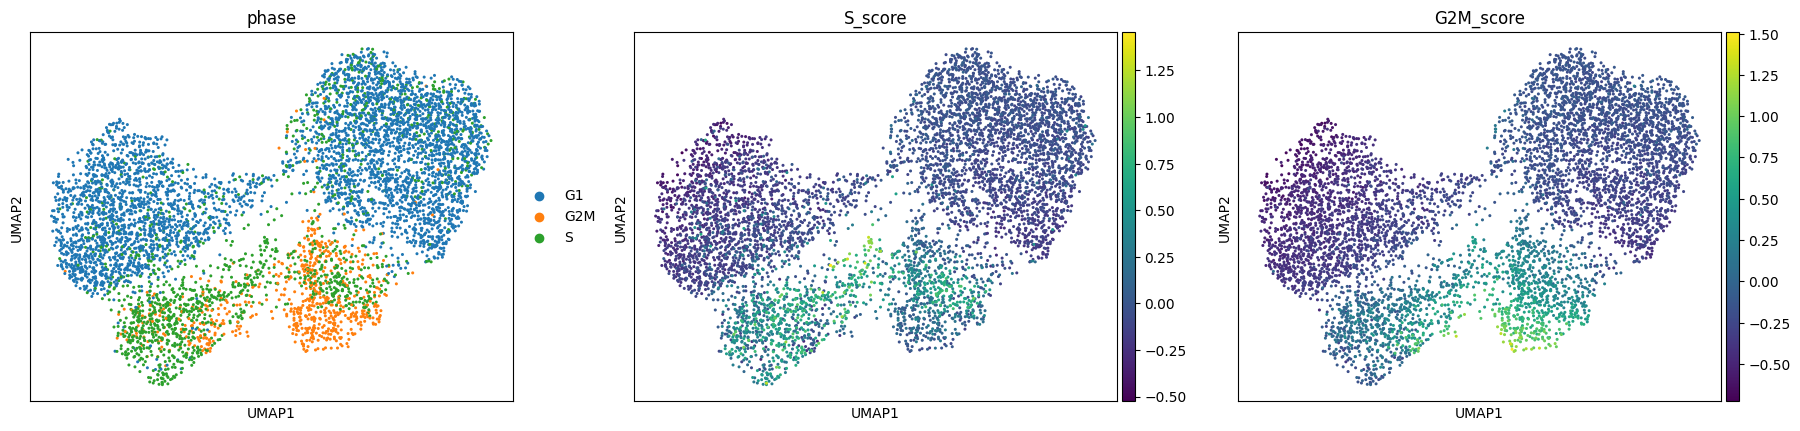

In [38]:
# Step 1: Get cell cycle genes from Scanpy or use your own list
# These are human cell cycle genes. If your dataset is mouse, convert gene names accordingly.
cc_genes_file = "https://raw.githubusercontent.com/theislab/scanpy_usage/master/180209_cell_cycle/data/regev_lab_cell_cycle_genes.txt"
cc_genes = pd.read_csv(cc_genes_file, header=None)[0].tolist()

# Split into S phase and G2M phase genes
s_genes = cc_genes[:43]
g2m_genes = cc_genes[43:]

# Step 2: Score cell cycle phases
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

# Now you can access:
# adata.obs['S_score'], adata.obs['G2M_score'], and adata.obs['phase']

# Make sure directory exists
os.makedirs("/home/maa81gb/single-cell-beta/figures", exist_ok=True)

# Plot UMAP but don't show it yet
sc.pl.umap(adata, color=['phase', 'S_score', 'G2M_score'], show=False)

# Save the figure with high dpi
plt.savefig("/home/maa81gb/single-cell-beta/figures/umap_cell_cycle_highres.png", dpi=300, bbox_inches='tight')

In [27]:
print(adata.var_names[:10])  # See sample of gene names


Index(['HES4', 'ISG15', 'ENSG00000224969', 'C1QTNF12', 'CFAP74',
       'ENSG00000287586', 'PER3', 'ERRFI1-DT', 'GPR157', 'MFAP2'],
      dtype='object', name='gene_symbol')


## GOAL: Detect a Shorter G1 Phase in TGF-β–treated Cells

In [39]:
import scanpy as sc
import pandas as pd

# Load gene list from Scanpy tutorial
cc_genes_file = "https://raw.githubusercontent.com/theislab/scanpy_usage/master/180209_cell_cycle/data/regev_lab_cell_cycle_genes.txt"
cc_genes = pd.read_csv(cc_genes_file, header=None)[0].tolist()

# Split genes into S and G2M phases
s_genes = cc_genes[:43]
g2m_genes = cc_genes[43:]

# Make sure gene names are in your data
s_genes = [gene for gene in s_genes if gene in adata.var_names]
g2m_genes = [gene for gene in g2m_genes if gene in adata.var_names]

sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)


In [41]:
adata

AnnData object with n_obs × n_vars = 6281 × 1992
    obs: 'condition', 'pct_cmo', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'doublet_scores', 'predicted_doublets', 'outlier', 'leiden', 'S_score', 'G2M_score', 'phase'
    var: 'CMO', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'gene_symbol', 'ensembl_gene_id', 'mito', 'ribo', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'condition_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap', 'phase_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

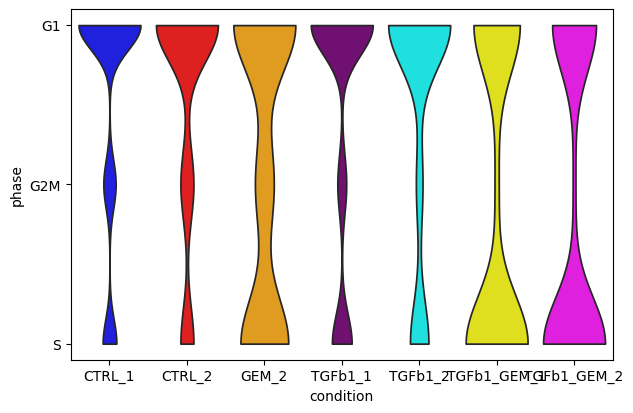

In [42]:
#2. Visualize the Distribution of Cell Cycle Phases by Condition
sc.pl.violin(adata, keys='phase', groupby='condition', stripplot=False)


In [43]:
adata.obs.groupby('condition')['phase'].value_counts(normalize=True)
#  lower G1 fractions, shows G1 is shorter, Because if G1 is shorter, fewer cells get "stuck" there, so at any given time, more are in S/G2M.

condition    phase
CTRL_1       G1       0.704461
             S        0.155762
             G2M      0.139777
CTRL_2       G1       0.704082
             G2M      0.147959
             S        0.147959
GEM_2        G1       0.482558
             S        0.372093
             G2M      0.145349
TGFb1_1      G1       0.684061
             S        0.217811
             G2M      0.098128
TGFb1_2      G1       0.712025
             S        0.212025
             G2M      0.075949
TGFb1_GEM_1  S        0.552707
             G1       0.413105
             G2M      0.034188
TGFb1_GEM_2  S        0.571765
             G1       0.404706
             G2M      0.023529
Name: phase, dtype: float64

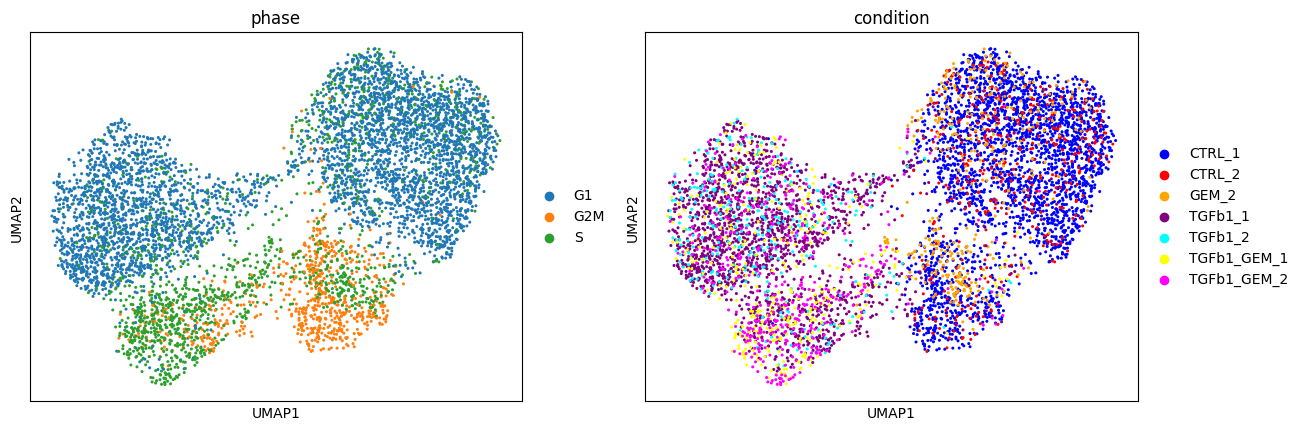

In [44]:
sc.pl.umap(adata, color=['phase', 'condition'])


In [46]:
# Calculate Mean Phase Score Per Condition
adata.obs.groupby('condition')[['S_score', 'G2M_score']].mean()
#Higher S/G2M scores → cells spending more time in those phases.


S_score  G2M_score
condition                       
CTRL_1      -0.029945  -0.075448
CTRL_2      -0.026636  -0.064203
GEM_2        0.159770   0.025978
TGFb1_1     -0.050948  -0.263659
TGFb1_2     -0.060513  -0.318463
TGFb1_GEM_1  0.194525  -0.172666
TGFb1_GEM_2  0.217528  -0.157096

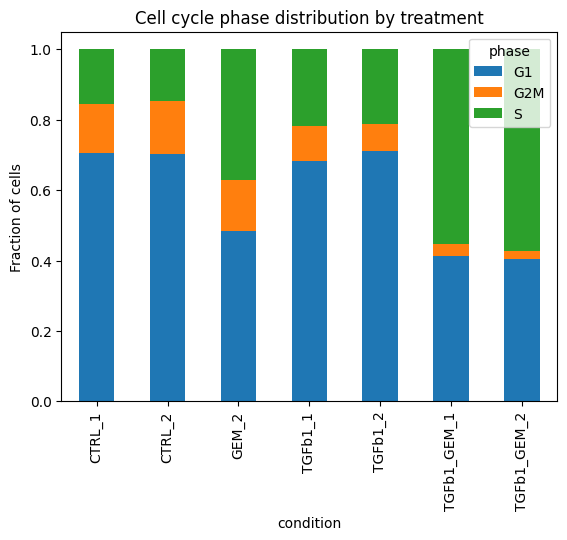

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a frequency table
phase_counts = adata.obs.groupby('condition')['phase'].value_counts(normalize=True).unstack()

# Plot
phase_counts.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of cells')
plt.title('Cell cycle phase distribution by treatment')
plt.show()


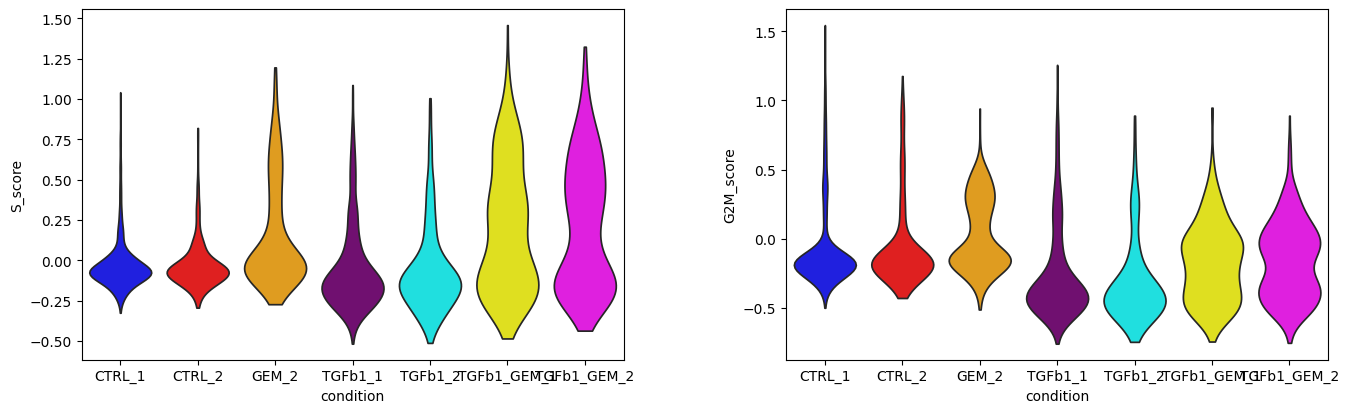

In [50]:
sc.pl.violin(adata, keys=['S_score', 'G2M_score'], groupby='condition', stripplot=False)


## Leiden clustering and cell cycle

In [51]:
adata

AnnData object with n_obs × n_vars = 6281 × 1992
    obs: 'condition', 'pct_cmo', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'doublet_scores', 'predicted_doublets', 'outlier', 'leiden', 'S_score', 'G2M_score', 'phase'
    var: 'CMO', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'gene_symbol', 'ensembl_gene_id', 'mito', 'ribo', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'condition_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap', 'phase_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [52]:
# Get phase distribution per leiden cluster (as fraction)
adata.obs.groupby('leiden')['phase'].value_counts(normalize=True)


leiden  phase
0       G1       0.848333
        S        0.142703
        G2M      0.008964
1       G1       0.883981
        S        0.116019
        G2M      0.000000
2       S        0.747642
        G2M      0.207547
        G1       0.044811
3       G2M      0.656209
        S        0.317647
        G1       0.026144
Name: phase, dtype: float64

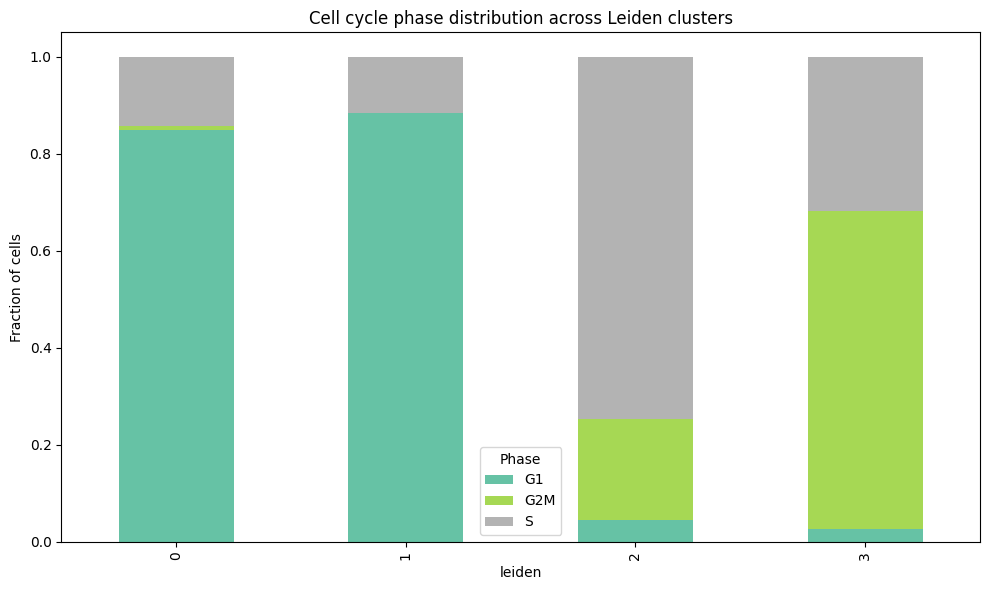

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to DataFrame for plotting
phase_counts = adata.obs.groupby('leiden')['phase'].value_counts(normalize=True).unstack().fillna(0)

# Barplot
phase_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.ylabel("Fraction of cells")
plt.title("Cell cycle phase distribution across Leiden clusters")
plt.legend(title="Phase")
plt.tight_layout()
plt.show()


In [55]:
# Calculate Mean Phase Score Per Condition
adata.obs.groupby('leiden')[['S_score', 'G2M_score']].mean()
#Higher S/G2M scores → cells spending more time in those phases.


S_score  G2M_score
leiden                     
0      -0.071999  -0.192216
1      -0.149702  -0.428950
2       0.386646   0.120902
3       0.222182   0.428158

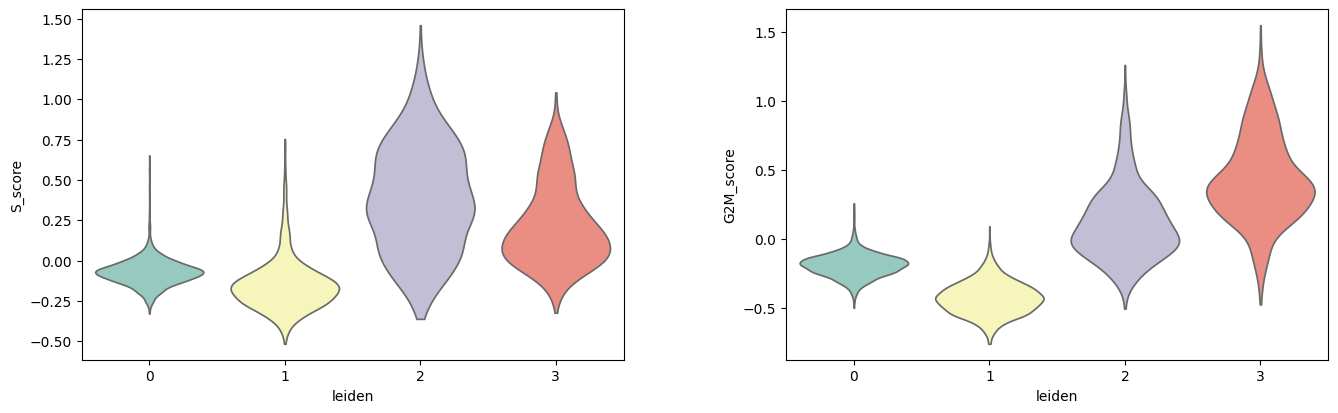

In [54]:
sc.pl.violin(adata, keys=['S_score', 'G2M_score'], groupby='leiden', stripplot=False, jitter=False)


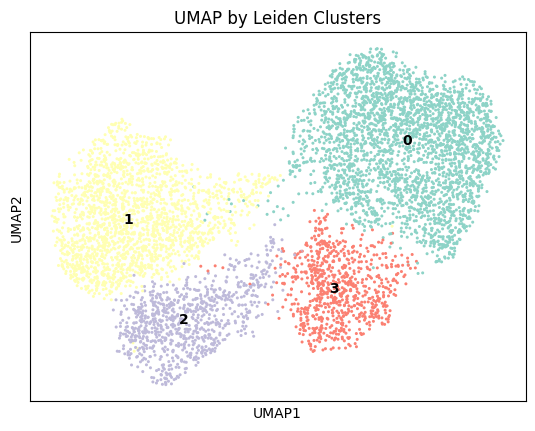

In [56]:
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='UMAP by Leiden Clusters')


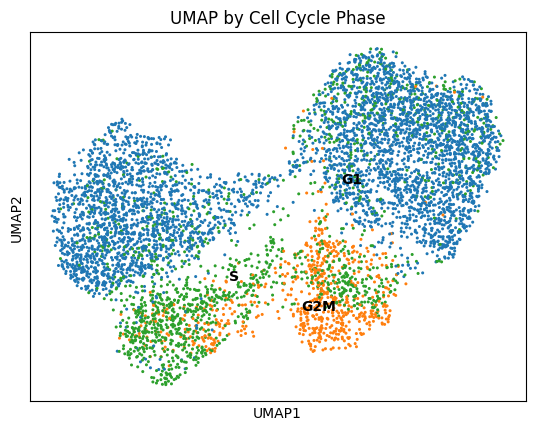

In [57]:
sc.pl.umap(adata, color='phase', title='UMAP by Cell Cycle Phase', legend_loc='on data')


### number of cells in each leiden and how those cells distributed in condition

In [58]:
# Count number of cells per Leiden cluster
adata.obs['leiden'].value_counts().sort_index()


0    2789
1    1879
2     848
3     765
Name: leiden, dtype: int64

In [59]:
# Show number of cells in cluster 2 per condition
adata.obs[adata.obs['leiden'] == '2']['condition'].value_counts()


TGFb1_1        379
TGFb1_GEM_2    223
TGFb1_GEM_1    178
TGFb1_2         51
GEM_2           15
CTRL_1           2
CTRL_2           0
Name: condition, dtype: int64

In [60]:
adata.obs[adata.obs['leiden'] == '2']['condition'].value_counts(normalize=True)


TGFb1_1        0.446934
TGFb1_GEM_2    0.262972
TGFb1_GEM_1    0.209906
TGFb1_2        0.060142
GEM_2          0.017689
CTRL_1         0.002358
CTRL_2         0.000000
Name: condition, dtype: float64

In [61]:
# Table of cell counts: Leiden clusters vs. conditions
pd.crosstab(adata.obs['leiden'], adata.obs['condition'])


condition  CTRL_1  CTRL_2  GEM_2  TGFb1_1  TGFb1_2  TGFb1_GEM_1  TGFb1_GEM_2
leiden                                                                      
0            2207     316    189       52        4            9           12
1              10       1      4     1286      252          149          177
2               2       0     15      379       51          178          223
3             471      75    136       46        9           15           13

In [62]:
pd.crosstab(adata.obs['leiden'], adata.obs['condition'], normalize='index')


condition    CTRL_1    CTRL_2     GEM_2   TGFb1_1   TGFb1_2  TGFb1_GEM_1  \
leiden                                                                     
0          0.791323  0.113302  0.067766  0.018645  0.001434     0.003227   
1          0.005322  0.000532  0.002129  0.684407  0.134114     0.079297   
2          0.002358  0.000000  0.017689  0.446934  0.060142     0.209906   
3          0.615686  0.098039  0.177778  0.060131  0.011765     0.019608   

condition  TGFb1_GEM_2  
leiden                  
0             0.004303  
1             0.094199  
2             0.262972  
3             0.016993

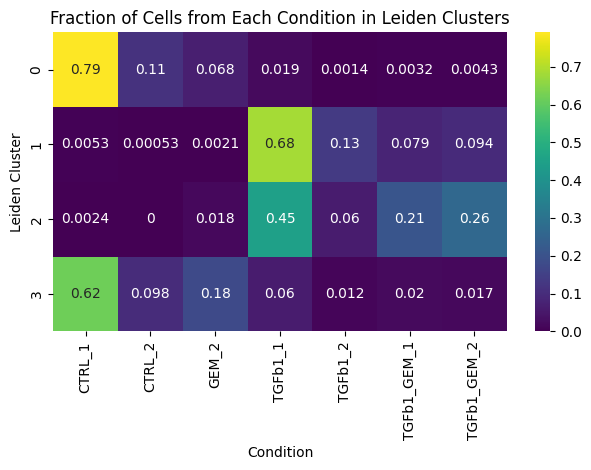

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

heat_data = pd.crosstab(adata.obs['leiden'], adata.obs['condition'], normalize='index')
sns.heatmap(heat_data, annot=True, cmap="viridis")
plt.title("Fraction of Cells from Each Condition in Leiden Clusters")
plt.ylabel("Leiden Cluster")
plt.xlabel("Condition")
plt.tight_layout()
plt.show()


## MYC

In [6]:
#loading whole genes to find MYC, it is not in hvg adta file.
#adata_myc = sc.read('/storage/users/data/PANC/H5AD_file/adata_filtered_no2D.h5ad')
#adata_myc1 = sc.read('/storage/users/data/PANC/H5AD_file/adata_filtered.h5ad')
#adata_myc2 = sc.read("/storage/users/data/PANC/H5AD_file/adata_filtered_no2D_clust.h5ad")
adata_myc2 = sc.read("/storage/users/data/PANC/H5AD_file/adata_filtered_no2D.h5ad")
#adata_myc = sc.read("/storage/users/data/PANC/H5AD_file/combined_adata.h5ad")

In [7]:
adata_myc2

AnnData object with n_obs × n_vars = 6356 × 26382
    obs: 'condition', 'pct_cmo', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'doublet_scores', 'predicted_doublets', 'outlier', 'leiden'
    var: 'CMO', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'gene_symbol', 'ensembl_gene_id', 'mito', 'ribo', 'n_cells'
    uns: 'condition_colors', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [8]:
# prepre clustering
sc.pp.scale(adata_myc2)
sc.tl.pca(adata_myc2, svd_solver="arpack") # PCA
sc.pp.neighbors(adata_myc2, n_neighbors=10, n_pcs=40) # Neighborhood Graph Construction

/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


In [9]:
sc.tl.umap(adata_myc2)
sc.tl.leiden(adata_myc2)

/tmp/ipykernel_572752/2464569724.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_myc2)


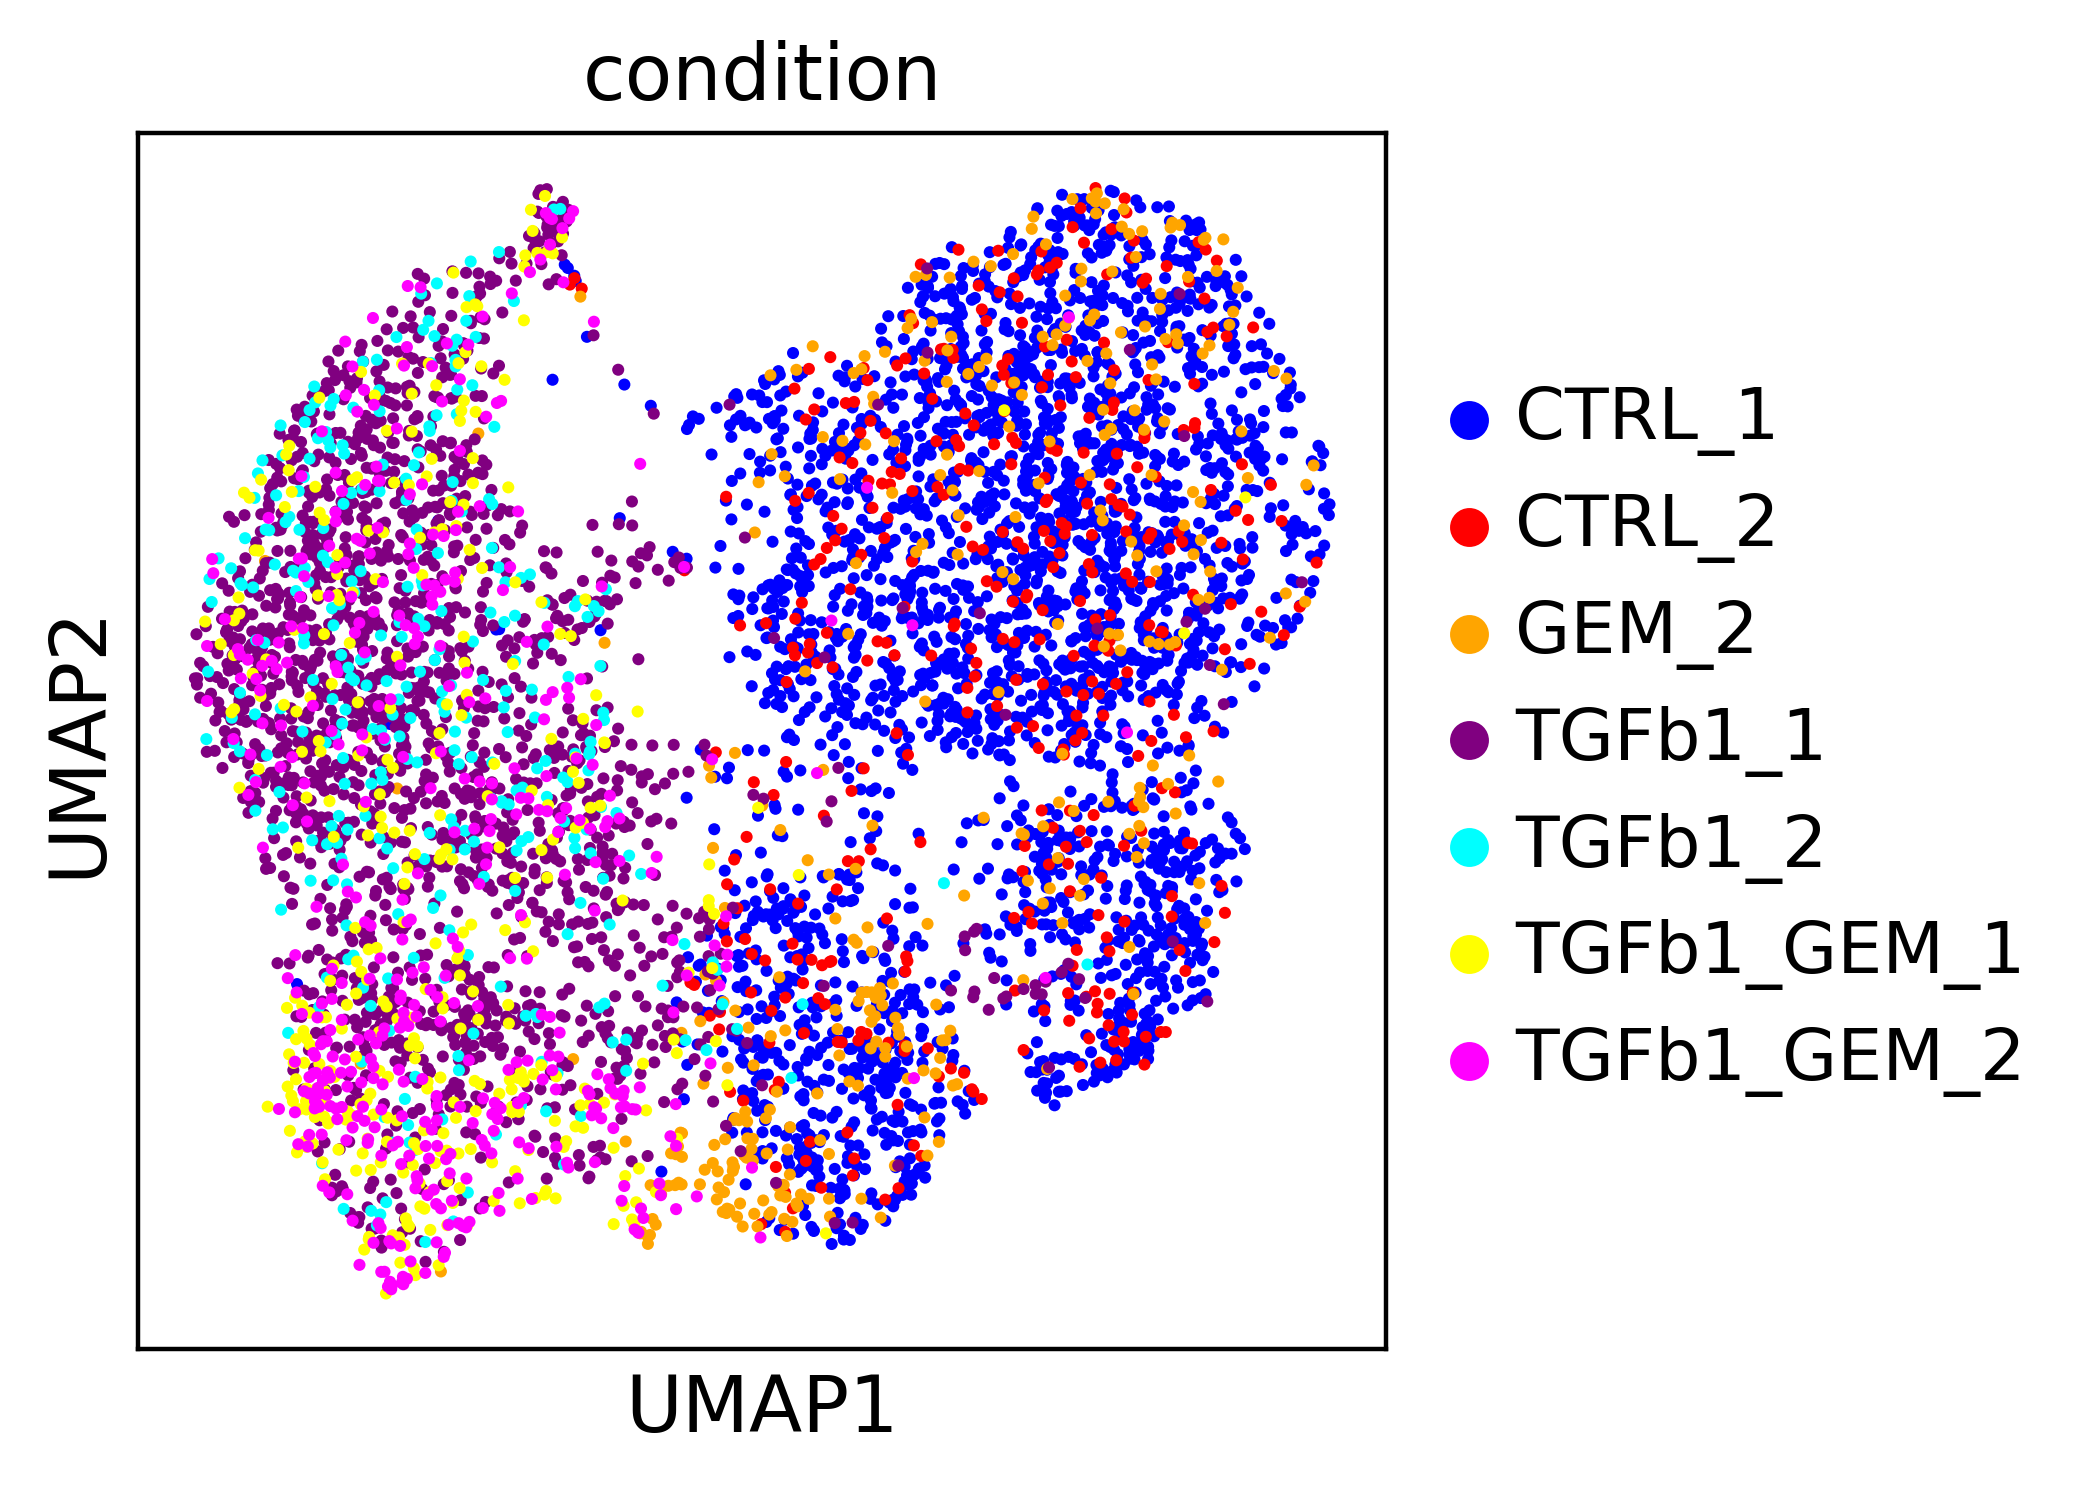

In [10]:
# Predefined condition-to-color mapping
condition_colors = {
    'CTRL_1': 'blue',
    'CTRL_2': 'red',
    'CTRL_2D': 'green',
    'GEM_2': 'orange',
    'TGFb1_1': 'purple',
    'TGFb1_2': 'cyan',
    'TGFb1_GEM_1': 'yellow',
    'TGFb1_GEM_2': 'magenta'
}

# Ensure all conditions in adata.obs['condition'] have a color mapping
conditions = adata_myc2.obs['condition'].unique()
missing_conditions = set(conditions) - set(condition_colors.keys())
if missing_conditions:
    raise ValueError(f"Color mapping missing for conditions: {missing_conditions}")

# Plot the UMAP with the predefined colors
sc.settings.set_figure_params(dpi=200, dpi_save=300)
sc.pl.umap(
    adata_myc2,
    color=['condition'],
    legend_loc='right margin',
    palette=condition_colors,
    save="_UMAP_cond_preprocessing.png"
)

Found 4 clusters with resolution: 0.16


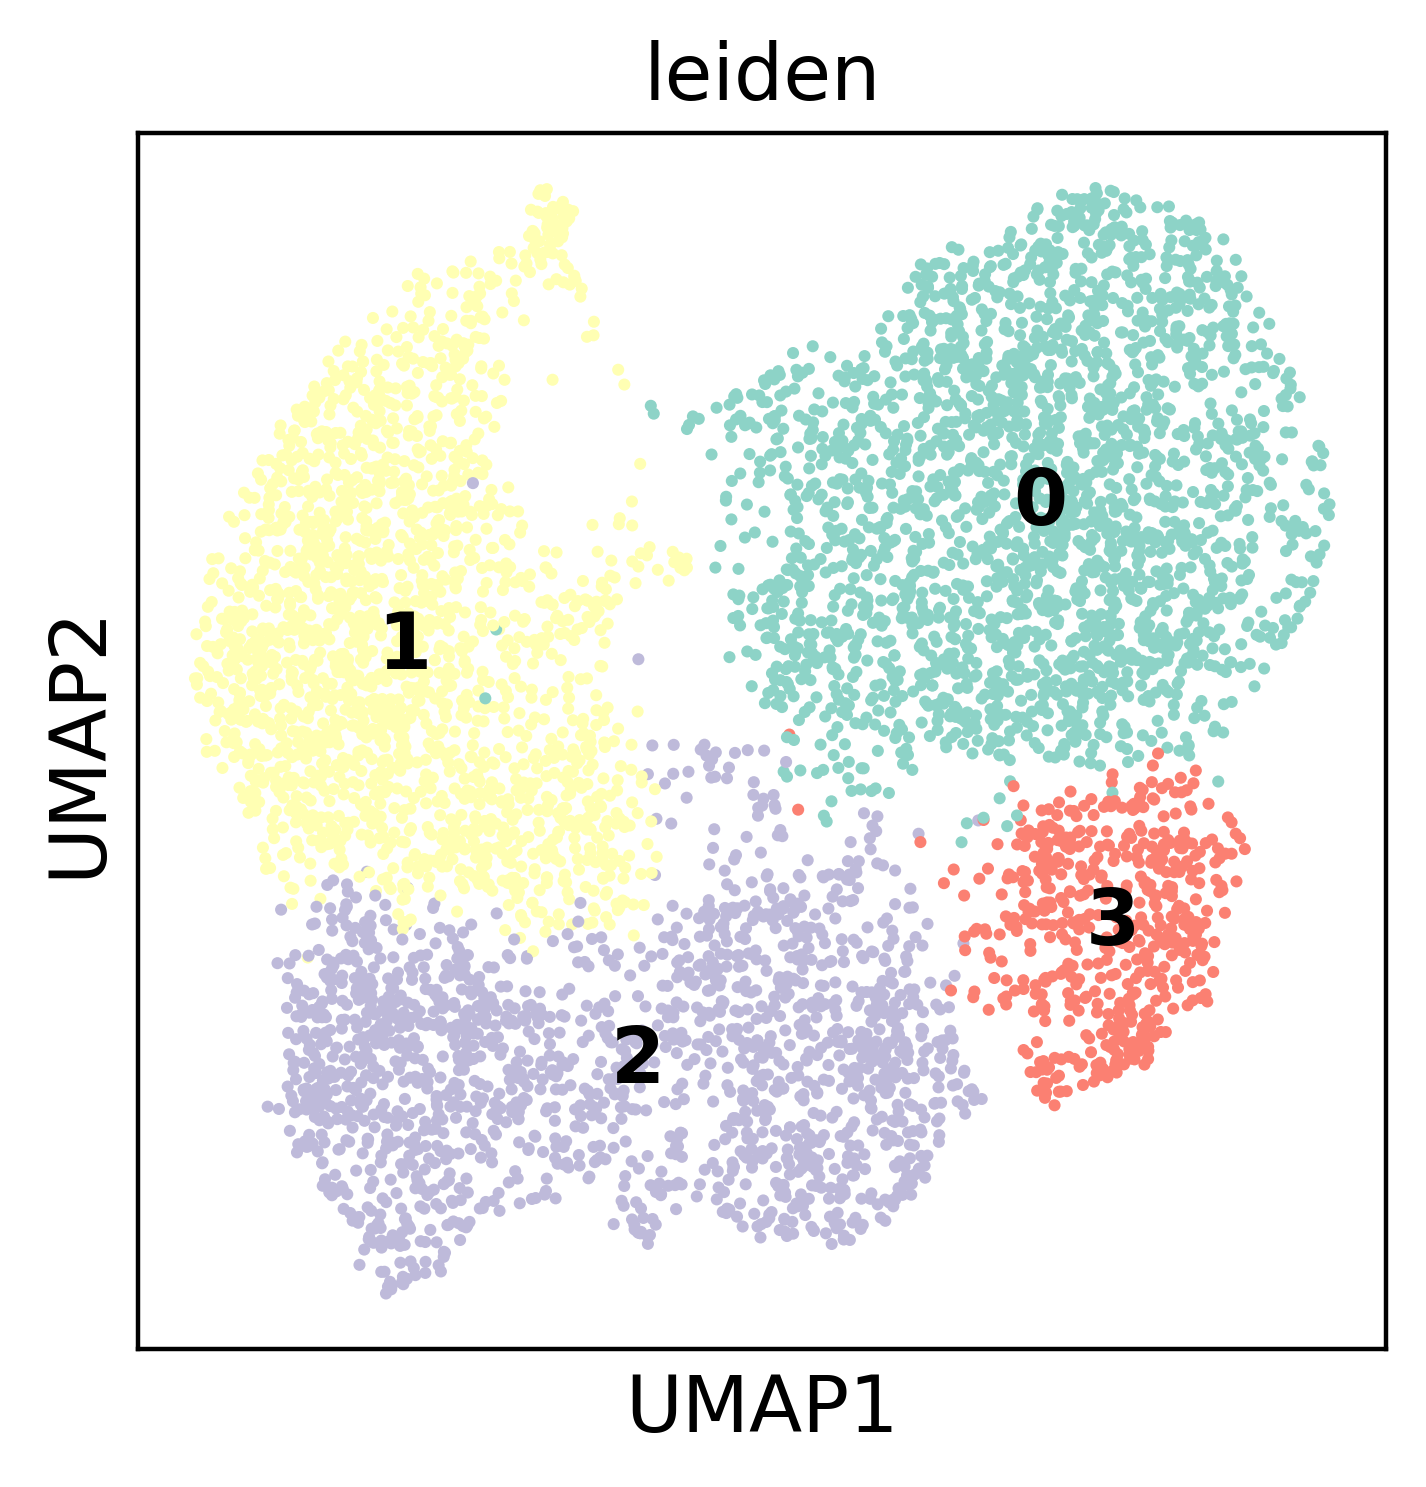

In [13]:
# Initialize variables
import seaborn as sns
found = False
max_resolution = 1.0  # Maximum resolution to try
step_size = 0.02      # Step size for resolution
max_iterations = int(max_resolution / step_size)  # Calculate maximum iterations

# Iterate through Leiden resolutions to find 7 clusters
for i in range(max_iterations):
    resolution = step_size * (i + 1)  # Compute resolution
    sc.tl.leiden(adata_myc2, resolution=resolution)  # Perform Leiden clustering
    n_clusters = adata_myc2.obs['leiden'].nunique()  # Count unique clusters

    if n_clusters == 4:
        print(f"Found 4 clusters with resolution: {resolution}")
        found = True
        break  # Stop iteration once the desired number of clusters is found

# Stop condition handling
if not found:
    print(f"Could not find 4 clusters within resolution up to {max_resolution}.")
else:
    # Define a color palette for the clusters
    leiden_clusters = adata_myc2.obs['leiden']
    color_palette = sns.color_palette('Set3', n_clusters)

    # Visualize the UMAP with Leiden clustering
    sc.pl.umap(
        adata_myc2,
        color='leiden',
        palette=color_palette,
        legend_loc='on data',
        save=f"_UMAP_leiden_{resolution:.2f}_clusters.png"
    )

In [167]:
adata_myc2

AnnData object with n_obs × n_vars = 6356 × 26382
    obs: 'condition', 'pct_cmo', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'doublet_scores', 'predicted_doublets', 'outlier', 'leiden'
    var: 'CMO', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'gene_symbol', 'ensembl_gene_id', 'mito', 'ribo', 'n_cells', 'mean', 'std'
    uns: 'condition_colors', 'leiden', 'log1p', 'neighbors', 'pca', 'umap', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [168]:
# Find any gene containing 'myc' (case-insensitive)
[gene for gene in adata_myc2.var_names if 'MYC' in gene.lower()]


[]

In [169]:
# Find any gene containing 'myc' (case-insensitive)
[gene for gene in adata_myc2.var_names if 'ENSG00000136997' in gene.strip()]


['ENSG00000136997']

In [170]:
adata_myc2.var_names

Index(['ENSG00000238009', 'ENSG00000241860', 'ENSG00000286448',
       'ENSG00000237491', 'ENSG00000177757', 'ENSG00000228794',
       'ENSG00000225880', 'ENSG00000230368', 'ENSG00000272438',
       'ENSG00000230699',
       ...
       'ENSG00000277400', 'ENSG00000274847', 'ENSG00000276256',
       'ENSG00000278198', 'ENSG00000278384', 'ENSG00000273748',
       'ENSG00000271254', 'ENSG00000276345', 'ENSG00000275869',
       'ENSG00000278817'],
      dtype='object', name='feature_id', length=26382)

In [14]:
adata3 = adata_myc2.copy()

In [179]:
#adata3.var.index = adata3.var.index.astype(str)


In [186]:
adata3.var_names

Index(['ENSG00000238009', 'ENSG00000241860', 'ENSG00000286448',
       'ENSG00000237491', 'ENSG00000177757', 'ENSG00000228794',
       'ENSG00000225880', 'ENSG00000230368', 'ENSG00000272438',
       'ENSG00000230699',
       ...
       'ENSG00000277400', 'ENSG00000274847', 'ENSG00000276256',
       'ENSG00000278198', 'ENSG00000278384', 'ENSG00000273748',
       'ENSG00000271254', 'ENSG00000276345', 'ENSG00000275869',
       'ENSG00000278817'],
      dtype='object', name='feature_id', length=26382)

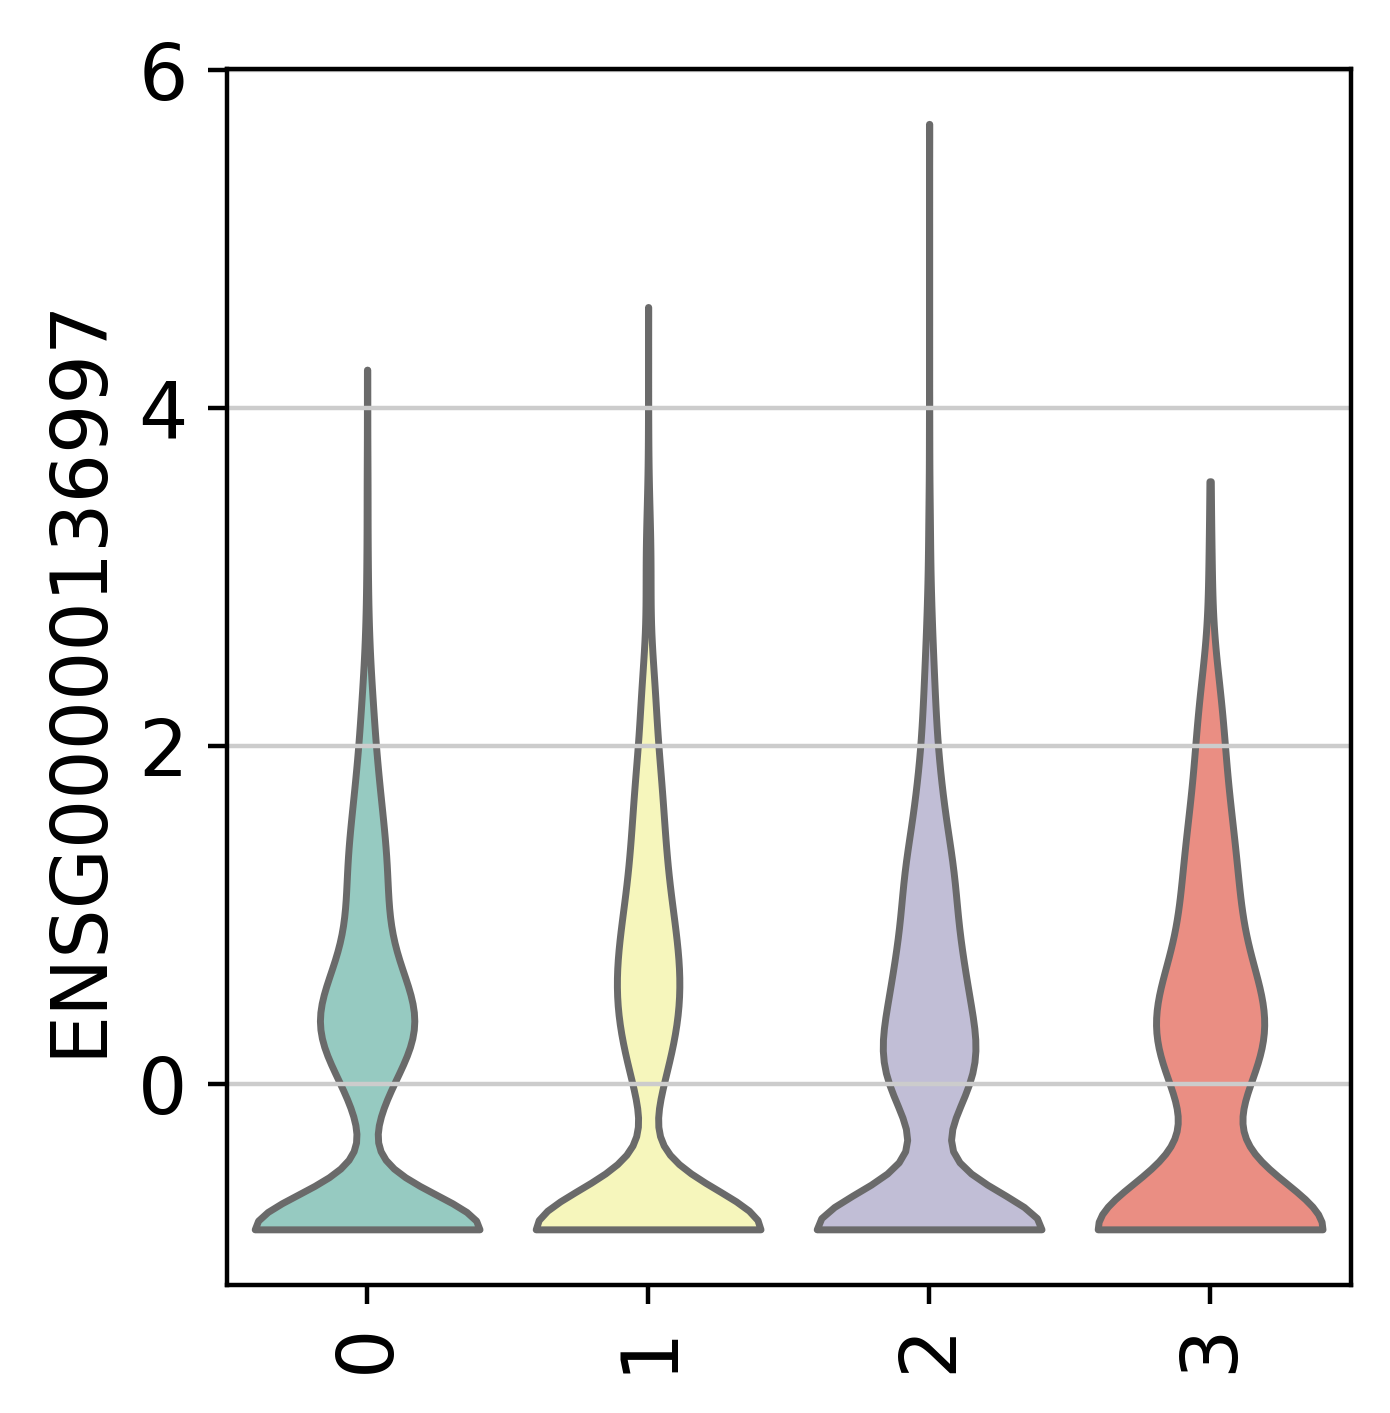

In [188]:
myc_id = "ENSG00000136997"  # MYC gene Ensembl ID
#my_id = "MYC"
sc.pl.violin(adata3, keys=myc_id, groupby="leiden", stripplot=False, rotation=90, jitter=False)

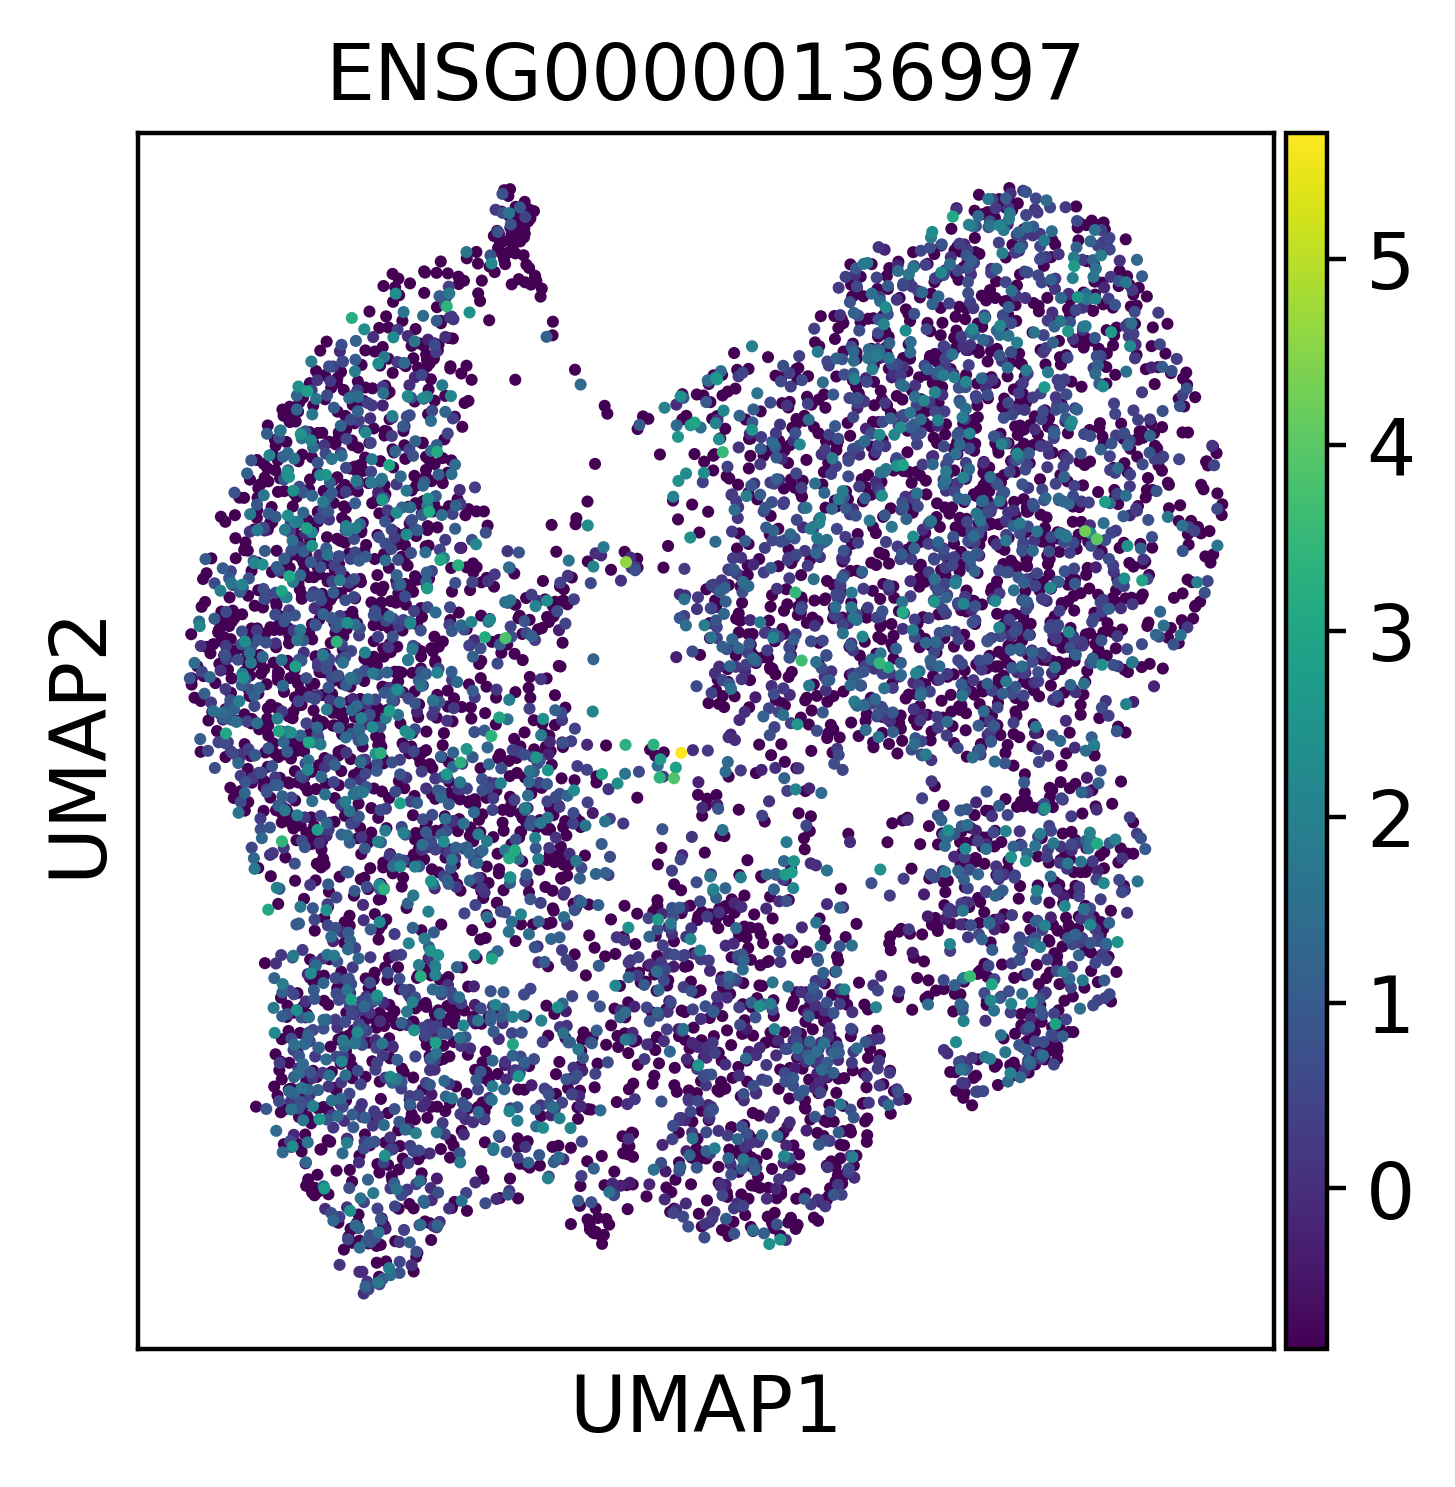

In [127]:
sc.pl.umap(adata3, color=myc_id)


In [189]:
adata3.obs[myc_id] = adata3[:, myc_id].X.toarray().flatten()  # for dense matrix
adata3.obs.groupby("condition")[myc_id].mean()


condition
CTRL_1        -0.016273
CTRL_2         0.033603
GEM_2         -0.160760
TGFb1_1        0.041652
TGFb1_2        0.171656
TGFb1_GEM_1   -0.056785
TGFb1_GEM_2   -0.053665
Name: ENSG00000136997, dtype: float64

In [190]:
from scipy.stats import ranksums

group1 = adata3.obs.loc[adata3.obs['condition'] == 'TGFb1_2', myc_id]
group2 = adata3.obs.loc[adata3.obs['condition'] == 'GEM_2', myc_id]

stat, p_value = ranksums(group1, group2)
print(f"Wilcoxon p-value: {p_value:.4e}")


Wilcoxon p-value: 2.7021e-04


In [193]:
from scipy.stats import kruskal

# Prepare groups for each condition
conditions = adata3.obs['condition'].unique()
groups = [adata3.obs.loc[adata3.obs['condition'] == cond, myc_id] for cond in conditions]

# Run Kruskal-Wallis test
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis p-value: {p:.4e}")


Kruskal-Wallis p-value: 1.4658e-03


/tmp/ipykernel_3001539/755126453.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='condition', y=myc_id, ci='sd', palette='viridis')
/tmp/ipykernel_3001539/755126453.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='condition', y=myc_id, ci='sd', palette='viridis')


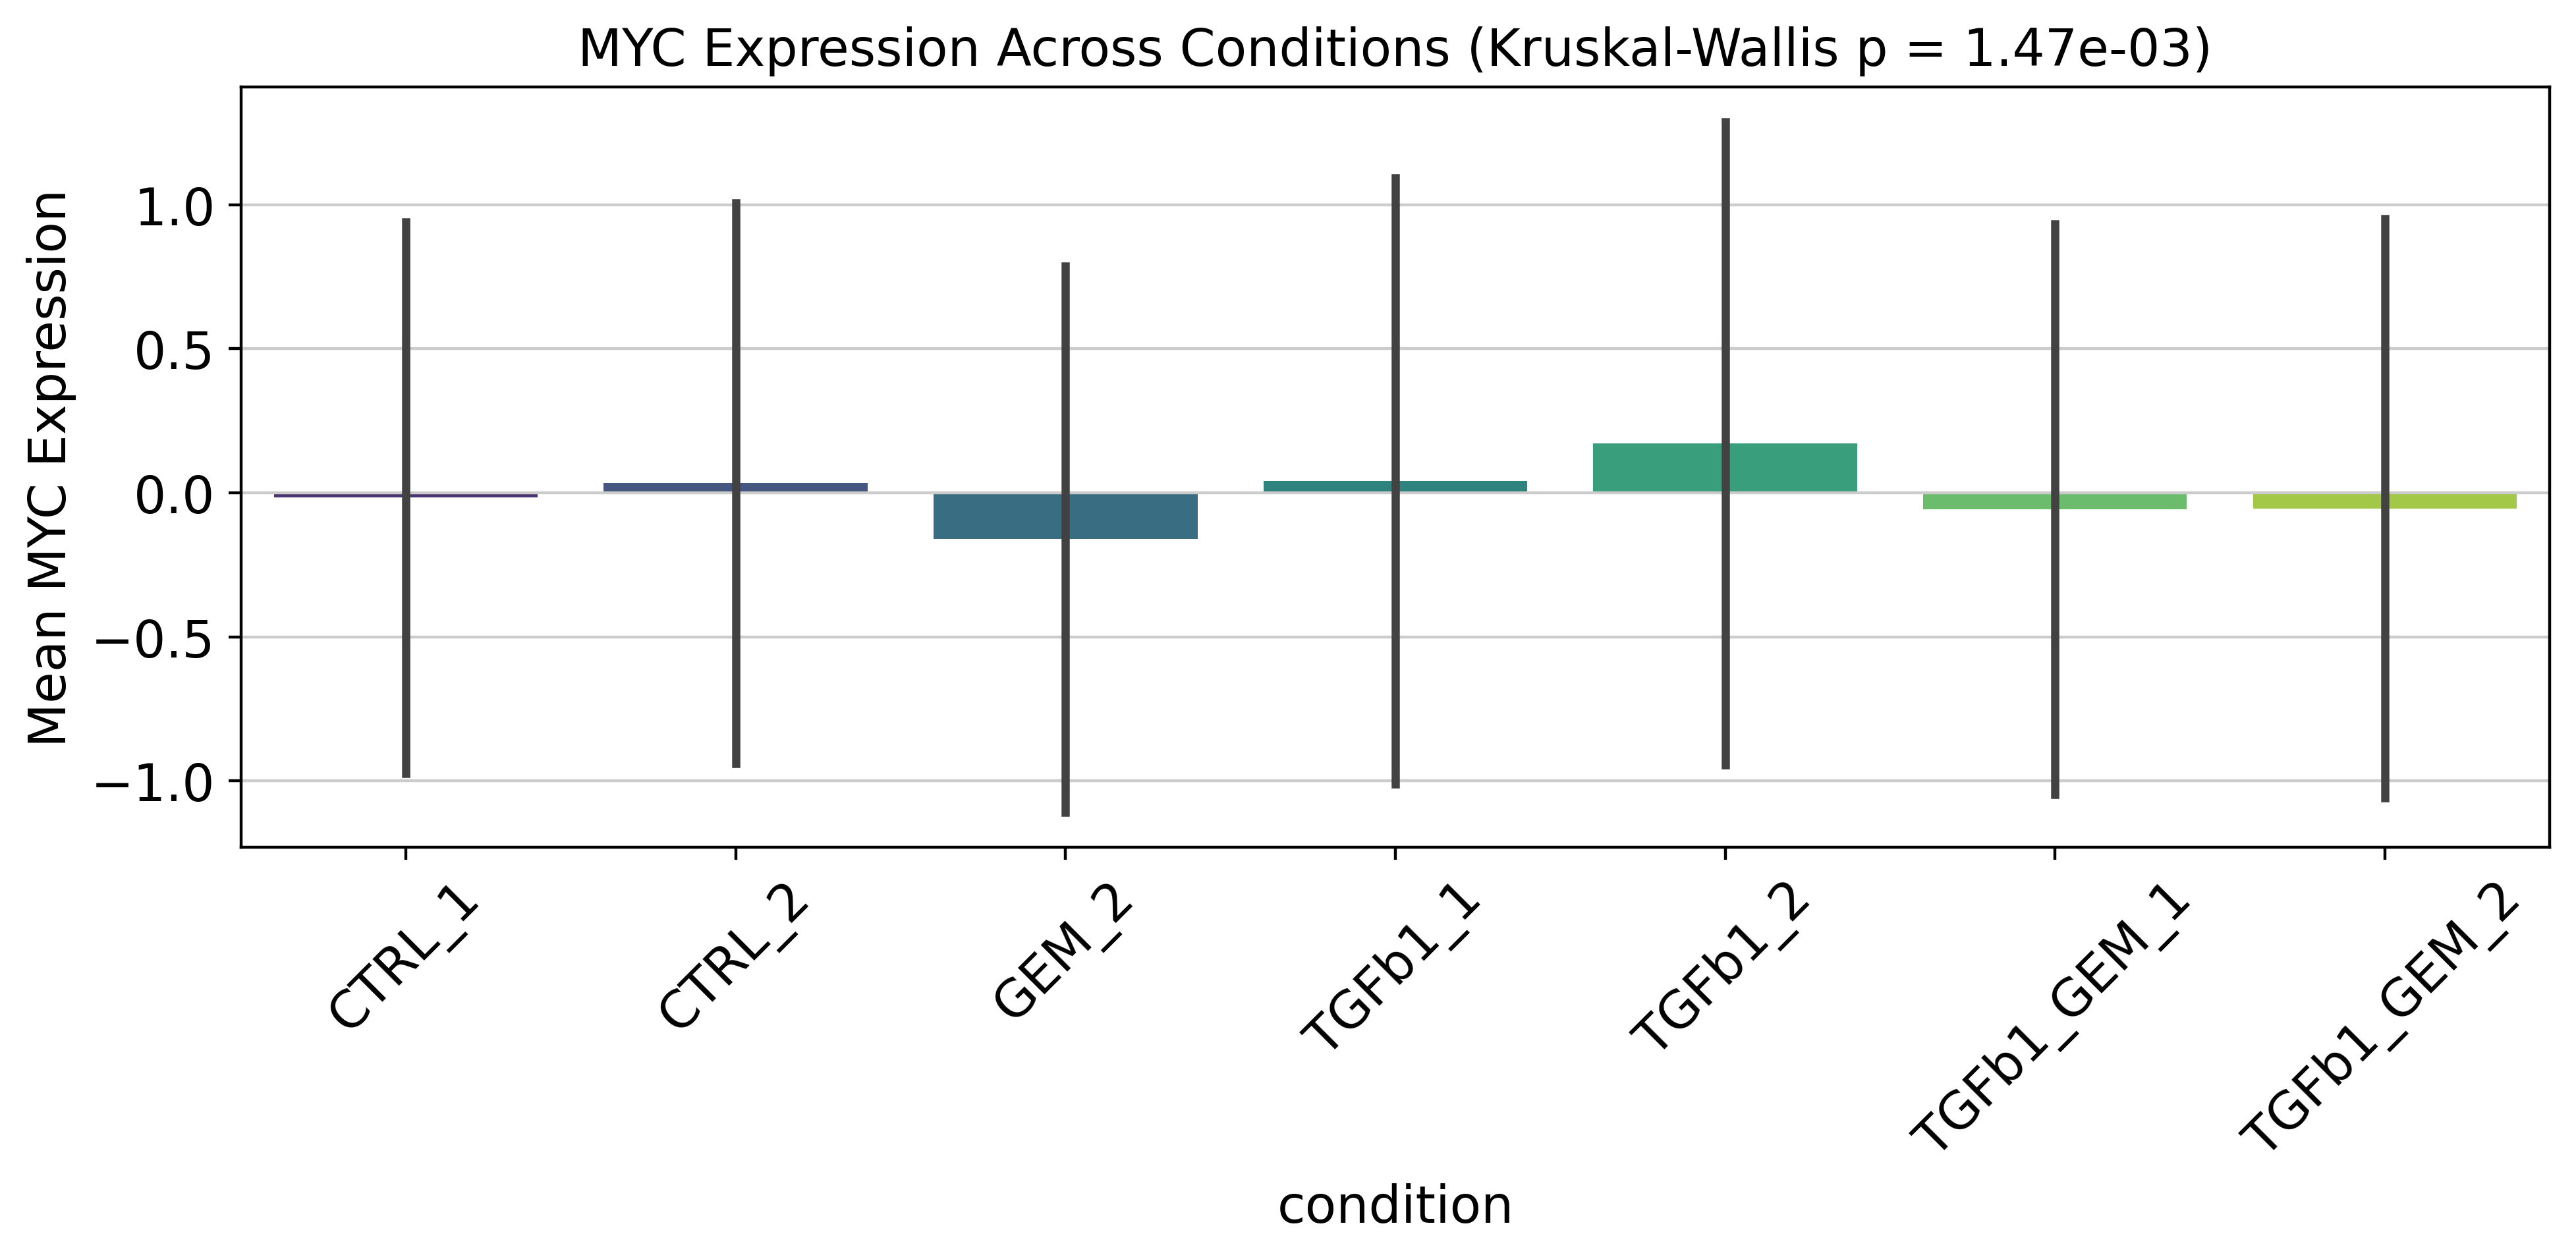

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for plotting
df = adata3.obs[['condition', myc_id]].copy()
df['condition'] = df['condition'].astype(str)

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='condition', y=myc_id, ci='sd', palette='viridis')
plt.title(f"MYC Expression Across Conditions (Kruskal-Wallis p = {p:.2e})")
plt.ylabel("Mean MYC Expression")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [197]:
import scikit_posthocs as sp
import pandas as pd

# Prepare dataframe with MYC expression and conditions
df = adata3.obs[[myc_id, 'condition']].copy()

# Run Dunn's post-hoc test with Bonferroni correction
dunn_results = sp.posthoc_dunn(df, val_col=myc_id, group_col='condition', p_adjust='bonferroni')

print(dunn_results)


               CTRL_1    CTRL_2     GEM_2   TGFb1_1   TGFb1_2  TGFb1_GEM_1  \
CTRL_1       1.000000  1.000000  0.089410  1.000000  0.253609     1.000000   
CTRL_2       1.000000  1.000000  0.085279  1.000000  1.000000     1.000000   
GEM_2        0.089410  0.085279  1.000000  0.019069  0.001235     1.000000   
TGFb1_1      1.000000  1.000000  0.019069  1.000000  1.000000     1.000000   
TGFb1_2      0.253609  1.000000  0.001235  1.000000  1.000000     0.164537   
TGFb1_GEM_1  1.000000  1.000000  1.000000  1.000000  0.164537     1.000000   
TGFb1_GEM_2  1.000000  1.000000  1.000000  1.000000  0.101602     1.000000   

             TGFb1_GEM_2  
CTRL_1          1.000000  
CTRL_2          1.000000  
GEM_2           1.000000  
TGFb1_1         1.000000  
TGFb1_2         0.101602  
TGFb1_GEM_1     1.000000  
TGFb1_GEM_2     1.000000  


In [198]:
adata3

AnnData object with n_obs × n_vars = 6356 × 26382
    obs: 'condition', 'pct_cmo', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'doublet_scores', 'predicted_doublets', 'outlier', 'leiden', 'ENSG00000136997'
    var: 'CMO', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'gene_symbol', 'ensembl_gene_id', 'mito', 'ribo', 'n_cells', 'mean', 'std'
    uns: 'condition_colors', 'leiden', 'log1p', 'neighbors', 'pca', 'umap', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [199]:
# Find any gene containing 'rb1' (case-insensitive)
[gene for gene in adata3.var_names if 'ENSG00000139687' in gene.strip()]


['ENSG00000139687']

In [200]:
rb1_id = 'ENSG00000139687'  # ENSG ID for RB1, verify in your adata.var_names
adata3.obs[rb1_id] = adata3[:, rb1_id].X.toarray().flatten()  # for dense matrix
adata3.obs.groupby("condition")[rb1_id].mean()


condition
CTRL_1        -0.021236
CTRL_2        -0.013936
GEM_2         -0.067130
TGFb1_1       -0.041251
TGFb1_2        0.132145
TGFb1_GEM_1    0.192461
TGFb1_GEM_2    0.111931
Name: ENSG00000139687, dtype: float64

/tmp/ipykernel_3001539/125357098.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='condition', y=rb1_id, ci='sd', palette='viridis')
/tmp/ipykernel_3001539/125357098.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='condition', y=rb1_id, ci='sd', palette='viridis')


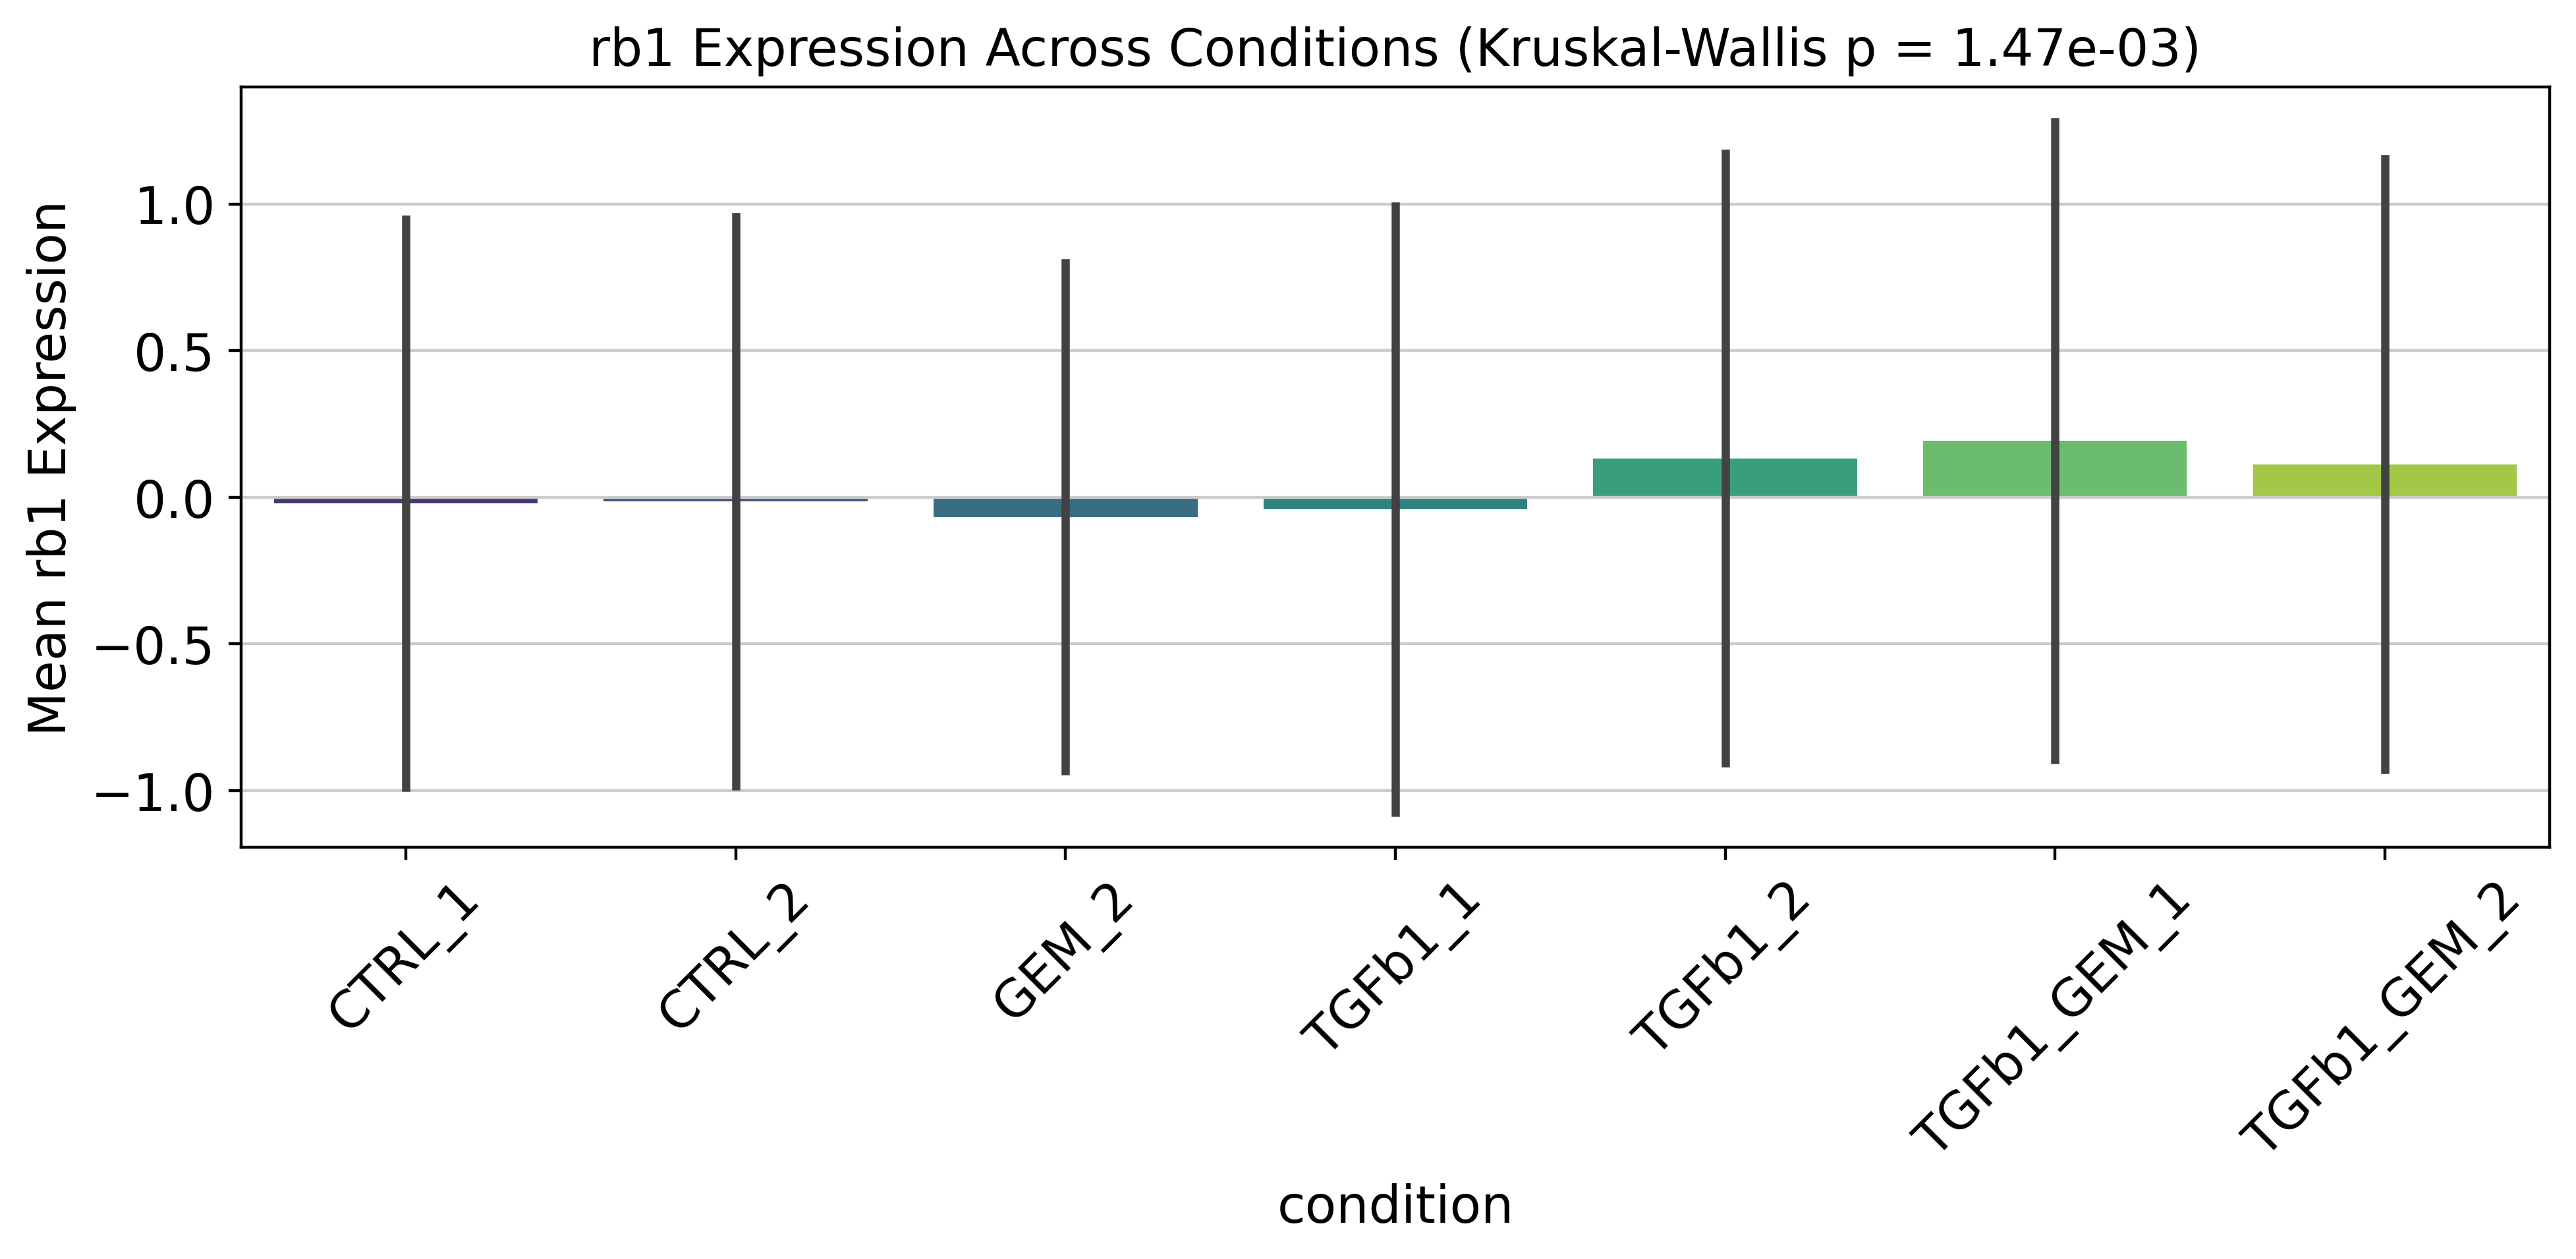

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for plotting
df = adata3.obs[['condition', rb1_id]].copy()
df['condition'] = df['condition'].astype(str)

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='condition', y=rb1_id, ci='sd', palette='viridis')
plt.title(f"rb1 Expression Across Conditions (Kruskal-Wallis p = {p:.2e})")
plt.ylabel("Mean rb1 Expression")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [202]:
gene_symbol_to_ensembl = {
    'CDK4': 'ENSG00000135446',    # keep this if correct
    'CDK6': 'ENSG00000105810',    # keep this if correct
    'CDK2': 'ENSG00000123374',    # keep this if correct
    'CCND1': 'ENSG00000110092',
    'CCND2': 'ENSG00000118971',
    'CCND3': 'ENSG00000112576',
    'CCNE1': 'ENSG00000105173',
    'CCNE2': 'ENSG00000175305'
}


In [203]:
adata3.var["gene_symbol"]

feature_id
ENSG00000238009    ENSG00000238009
ENSG00000241860    ENSG00000241860
ENSG00000286448    ENSG00000286448
ENSG00000237491          LINC01409
ENSG00000177757             FAM87B
                        ...       
ENSG00000273748    ENSG00000273748
ENSG00000271254       LOC124905564
ENSG00000276345    ENSG00000276345
ENSG00000275869       LOC102723713
ENSG00000278817    ENSG00000278817
Name: gene_symbol, Length: 26382, dtype: category
Categories (26376, object): ['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', ..., 'ZYG11B', 'ZYX', 'ZZEF1', 'ZZZ3']

In [204]:
adata3.var_names 

Index(['ENSG00000238009', 'ENSG00000241860', 'ENSG00000286448',
       'ENSG00000237491', 'ENSG00000177757', 'ENSG00000228794',
       'ENSG00000225880', 'ENSG00000230368', 'ENSG00000272438',
       'ENSG00000230699',
       ...
       'ENSG00000277400', 'ENSG00000274847', 'ENSG00000276256',
       'ENSG00000278198', 'ENSG00000278384', 'ENSG00000273748',
       'ENSG00000271254', 'ENSG00000276345', 'ENSG00000275869',
       'ENSG00000278817'],
      dtype='object', name='feature_id', length=26382)

In [205]:
"ENSG00000135446" in adata3.var_names

True

In [206]:
# List of your gene Ensembl IDs
cdk_cyclins_ensembl = [
    'ENSG00000135446',  # CDK4
    'ENSG00000105810',  # CDK6
    'ENSG00000123374',  # CDK2
    'ENSG00000110092',  # CCND1
    'ENSG00000118971',  # CCND2
    'ENSG00000112576',  # CCND3
    'ENSG00000105173',  # CCNE1
    'ENSG00000175305'   # CCNE2
]

# Keep only those genes present in your dataset
present_genes = [g for g in cdk_cyclins_ensembl if g in adata3.var_names]

import pandas as pd
import numpy as np

# Extract expression matrix (cells x genes) for present genes
expr = adata3[:, present_genes].X.toarray() if hasattr(adata3.X, "toarray") else adata3[:, present_genes].X

# Build a DataFrame: rows = cells, columns = genes
df_expr = pd.DataFrame(expr, columns=present_genes, index=adata3.obs_names)

# Add the 'condition' annotation from obs
df_expr['condition'] = adata3.obs['condition']

# Group by condition and calculate mean expression per gene
mean_expr_by_condition = df_expr.groupby('condition').mean()

print(mean_expr_by_condition)


             ENSG00000135446  ENSG00000105810  ENSG00000123374  \
condition                                                        
CTRL_1             -0.039546        -0.319335        -0.134607   
CTRL_2             -0.052945        -0.315837        -0.148240   
GEM_2               0.220659        -0.301882         0.082023   
TGFb1_1            -0.039822         0.381440        -0.018273   
TGFb1_2            -0.024195         0.364848         0.047109   
TGFb1_GEM_1         0.145904         0.390983         0.535650   
TGFb1_GEM_2         0.179481         0.329227         0.499186   

             ENSG00000110092  ENSG00000118971  ENSG00000112576  \
condition                                                        
CTRL_1             -0.423762        -0.090657        -0.168169   
CTRL_2             -0.445579        -0.098993        -0.159983   
GEM_2              -0.441728        -0.102204         0.021728   
TGFb1_1             0.506314         0.120216         0.097959   
TGFb1_2  

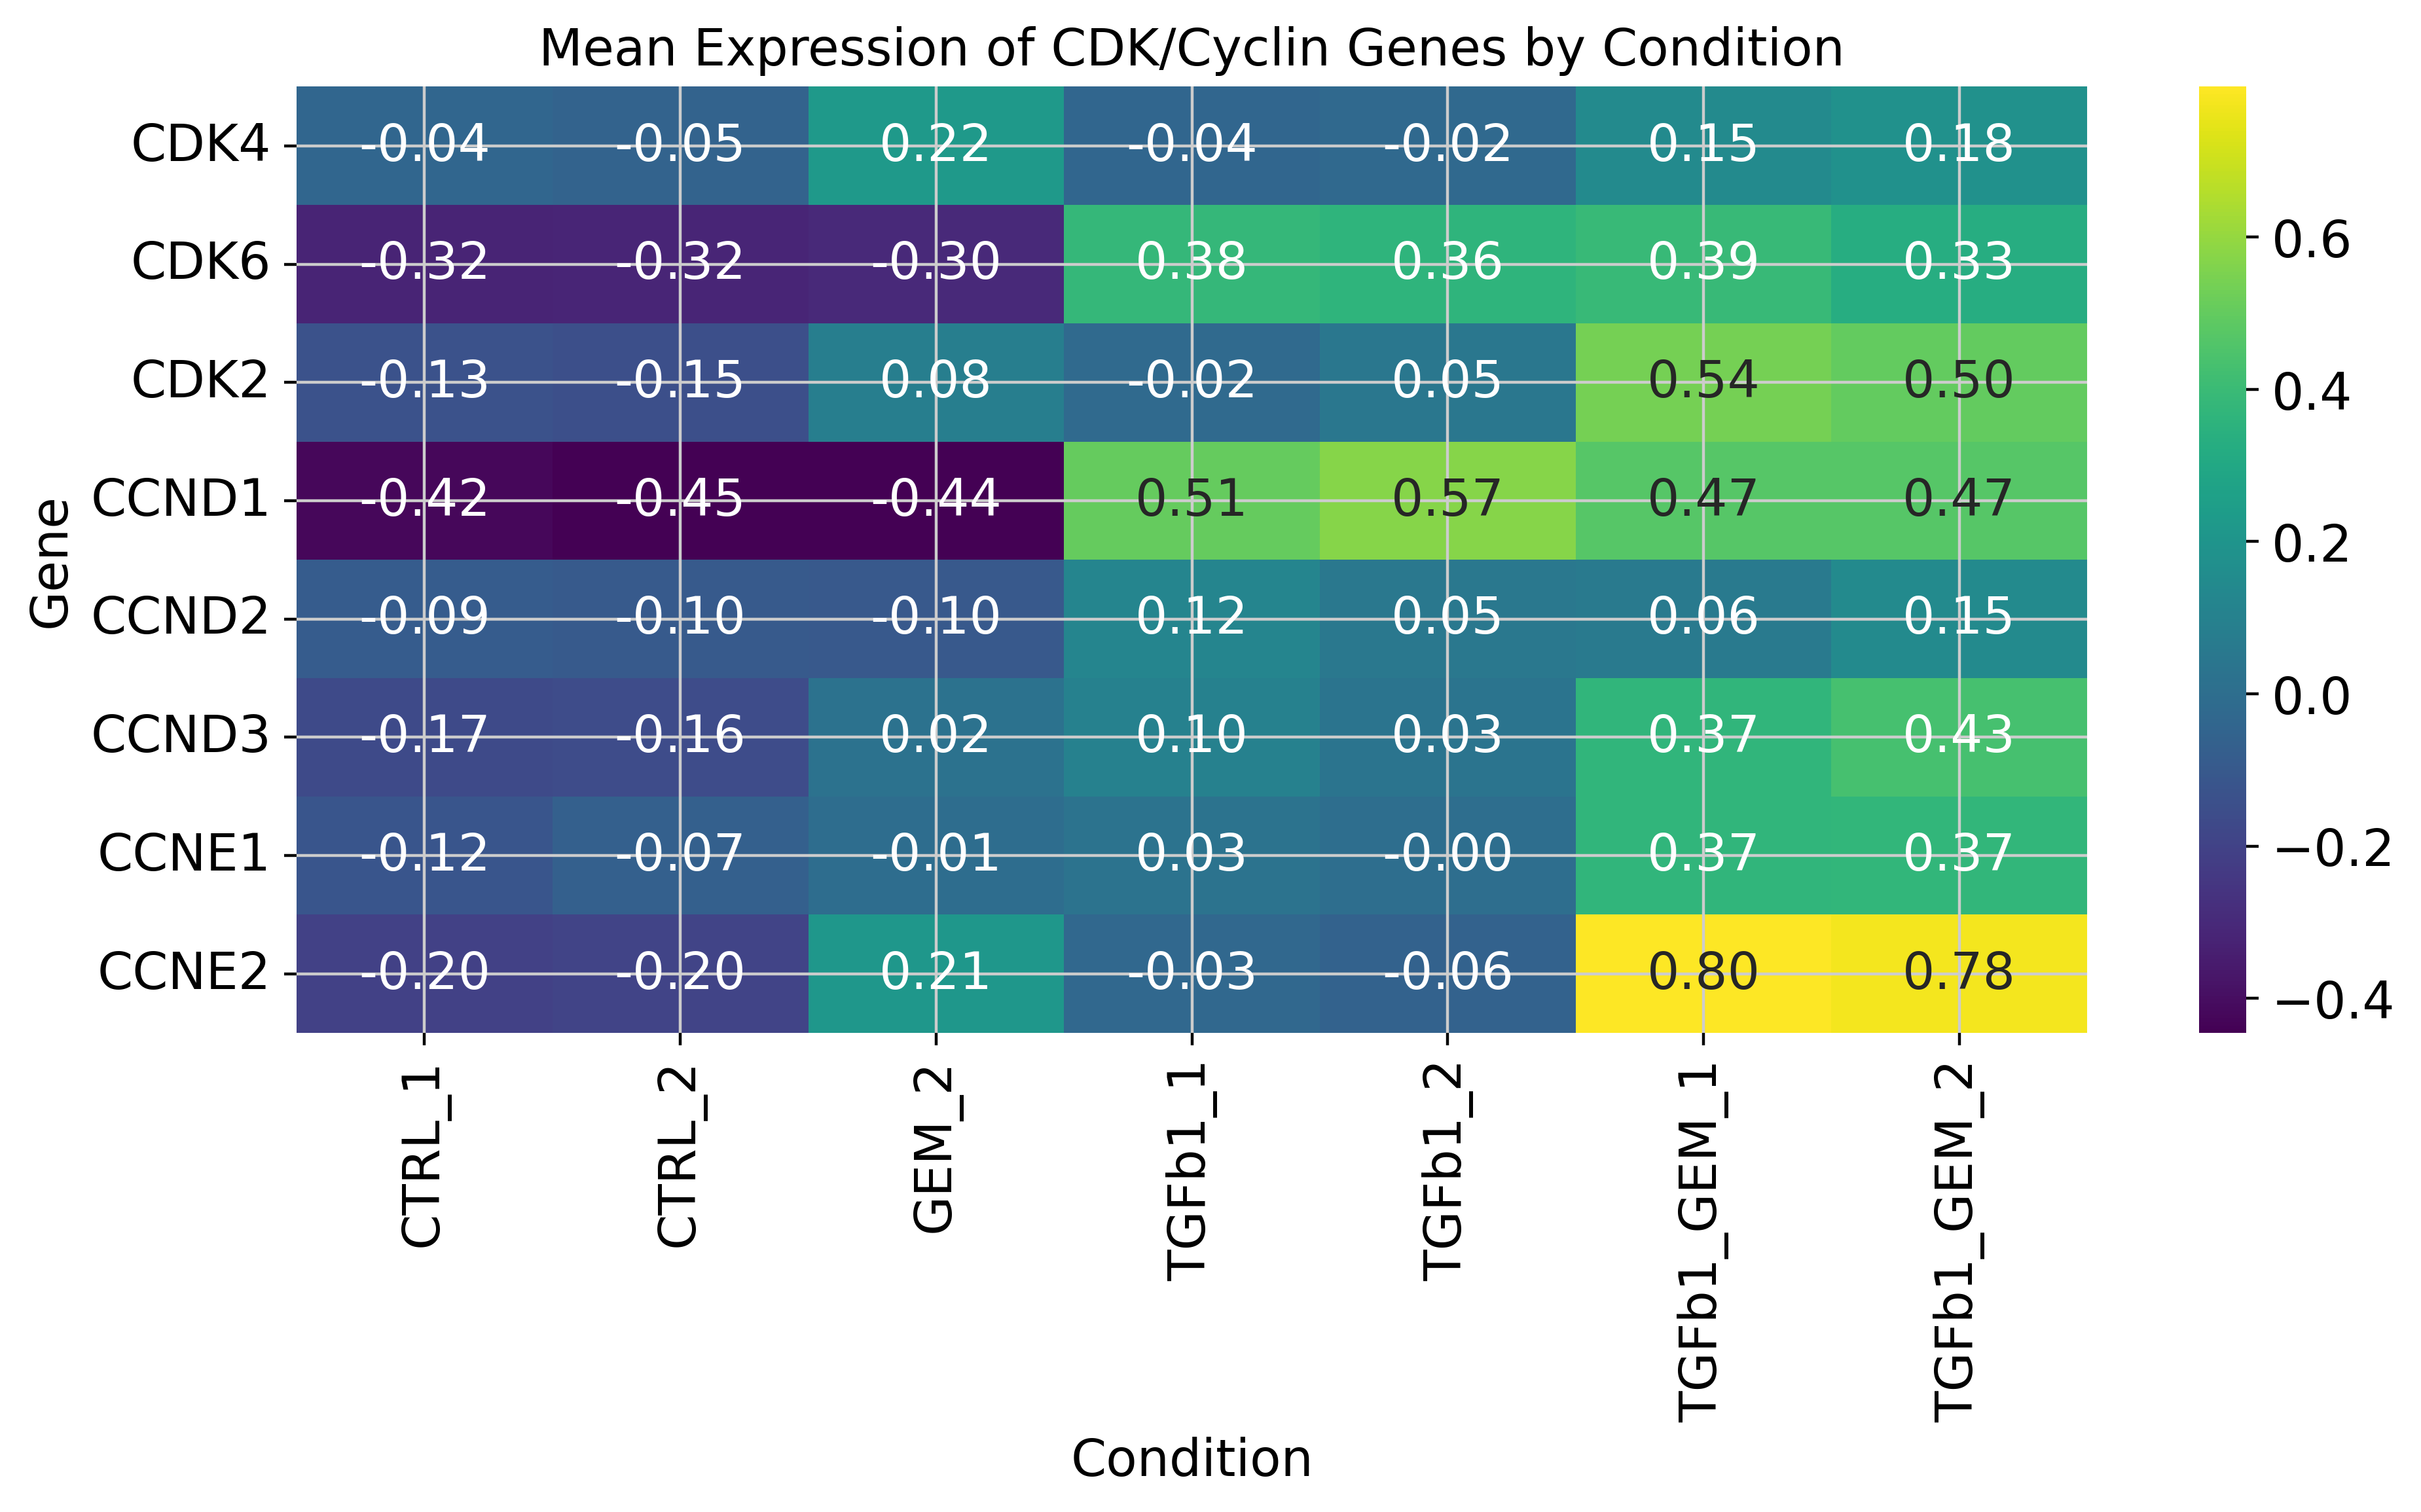

In [207]:
ensembl_to_gene = {
    'ENSG00000135446': 'CDK4',
    'ENSG00000105810': 'CDK6',
    'ENSG00000123374': 'CDK2',
    'ENSG00000110092': 'CCND1',
    'ENSG00000118971': 'CCND2',
    'ENSG00000112576': 'CCND3',
    'ENSG00000105173': 'CCNE1',
    'ENSG00000175305': 'CCNE2'
}
genes = list(ensembl_to_gene.keys())

# Add each gene's expression to obs
for gene_id in genes:
    if gene_id in adata3.var_names:
        adata3.obs[gene_id] = adata3[:, gene_id].X.toarray().flatten()

import pandas as pd

# Now we can group
gene_expr = adata3.obs.groupby("condition")[genes].mean()

# Rename columns to gene symbols
gene_expr.columns = [ensembl_to_gene[g] for g in gene_expr.columns]



plt.figure(figsize=(10, 6))
sns.heatmap(gene_expr.T, cmap="viridis", annot=True, fmt=".2f")
plt.title("Mean Expression of CDK/Cyclin Genes by Condition")
plt.xlabel("Condition")
plt.ylabel("Gene")
plt.tight_layout()
plt.show()



In [208]:
from scipy.stats import kruskal

# Store results
pvals = {}

# For each gene
for gene_id in genes:
    data_by_group = [group[gene_id].values for name, group in adata3.obs.groupby("condition")]
    stat, p = kruskal(*data_by_group)
    pvals[gene_id] = p

# Convert to DataFrame
pval_df = pd.DataFrame.from_dict(pvals, orient='index', columns=['p-value'])
pval_df.index = [ensembl_to_gene[g] for g in pval_df.index]
pval_df = pval_df.sort_values('p-value')

# Optionally: add significance stars
pval_df['significance'] = pd.cut(pval_df['p-value'],
                                 bins=[0, 0.001, 0.01, 0.05, 1],
                                 labels=['***', '**', '*', 'ns'])

print(pval_df)


             p-value significance
CCND1  5.138848e-284          ***
CDK6   1.236525e-144          ***
CCNE2  1.381570e-127          ***
CDK2    1.710176e-48          ***
CCND3   6.935547e-40          ***
CCNE1   1.864800e-28          ***
CCND2   1.329025e-12          ***
CDK4    2.233048e-07          ***


In [16]:
import scanpy as sc
import pandas as pd


# Make sure "gene_symbol" exists
print(adata3.var["gene_symbol"].head())

# Replace Ensembl IDs with gene symbols as feature (row) names
adata3.var_names = adata3.var["gene_symbol"]

# Ensure no duplicate gene symbols (important for Seurat)
adata3 = adata3[:, ~adata3.var_names.duplicated()]


# Drop genes with missing or duplicated names
adata3.var_names = adata3.var["gene_symbol"]
adata3 = adata3[:, ~adata3.var_names.duplicated()]
adata3 = adata3[:, ~adata3.var_names.isna()]

# Export again
exp_df = pd.DataFrame(adata3.X.toarray(), index=adata3.obs_names, columns=adata3.var_names)
exp_df.T.to_csv("expression_matrix.txt", sep="\t", index=True, header=True, quoting=3)


feature_id
ENSG00000238009    ENSG00000238009
ENSG00000241860    ENSG00000241860
ENSG00000286448    ENSG00000286448
ENSG00000237491          LINC01409
ENSG00000177757             FAM87B
Name: gene_symbol, dtype: category
Categories (26376, object): ['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', ..., 'ZYG11B', 'ZYX', 'ZZEF1', 'ZZZ3']


/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/anndata/_core/anndata.py:864: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['ENSG00000238009', 'ENSG00000241860', 'ENSG00000286448', 'LINC01409', 'FAM87B']

    Inferred to be: categorical

  names = self._prep_dim_index(names, "var")
/home/maa81gb/anaconda3/envs/secondenv_clone/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [18]:
adata3.var_names

CategoricalIndex(['ENSG00000238009', 'ENSG00000241860', 'ENSG00000286448',
                  'LINC01409', 'FAM87B', 'LINC01128', 'LINC00115', 'FAM41C',
                  'ENSG00000272438', 'ENSG00000230699',
                  ...
                  'ENSG00000277400', 'MAFIP', 'ENSG00000276256',
                  'ENSG00000278198', 'ENSG00000278384', 'ENSG00000273748',
                  'LOC124905564', 'ENSG00000276345', 'LOC102723713',
                  'ENSG00000278817'],
                 categories=['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', ..., 'ZYG11B', 'ZYX', 'ZZEF1', 'ZZZ3'], ordered=False, dtype='category', name='gene_symbol', length=26376)

In [ ]:
import os
# Step 1: Get cell cycle genes from Scanpy or use your own list
# These are human cell cycle genes. If your dataset is mouse, convert gene names accordingly.
cc_genes_file = "https://raw.githubusercontent.com/theislab/scanpy_usage/master/180209_cell_cycle/data/regev_lab_cell_cycle_genes.txt"
cc_genes = pd.read_csv(cc_genes_file, header=None)[0].tolist()

# Split into S phase and G2M phase genes
s_genes = cc_genes[:43]
g2m_genes = cc_genes[43:]

# Step 2: Score cell cycle phases
sc.tl.score_genes_cell_cycle(adata3, s_genes=s_genes, g2m_genes=g2m_genes)

# Now you can access:
# adata.obs['S_score'], adata.obs['G2M_score'], and adata.obs['phase']

# Make sure directory exists
os.makedirs("/home/maa81gb/single-cell-beta/figures", exist_ok=True)

# Plot UMAP but don't show it yet
sc.pl.umap(adata3, color=['phase', 'S_score', 'G2M_score'], show=False)

# Save the figure with high dpi
plt.savefig("/home/maa81gb/single-cell-beta/figures/umap_cell_cycle_highres_whole_genes.png", dpi=300, bbox_inches='tight')